THE CODE INTENTS TO CARRY ANALYSIS END TO END FOR ADHD. WE HAVE ALSO WORKED ON BIRTH CONTROL DATA SET BUT NO SUPERVISED LEARNING WAS DONE . BUT ADHD IS DONE END TO END.

WE CREATE 3 ARCHITECTURE FOR THE TWO DATA SETS -ONE HOT KERAS, TFIDF,AND DOC2 VECTOR. FOR TFIDF i used 2 sub approaches. The same was used for test data as well 

In [ ]:

import os
import json
import gzip
import pandas as pd
from urllib.request import urlopen
import keras
import rpy2
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!apt-get install rar

!rar a "/content/drive/My Drive/Project Text USML Part 2"

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  rar
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 295 kB of archives.
After this operation, 799 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/multiverse amd64 rar amd64 2:5.5.0-1 [295 kB]
Fetched 295 kB in 1s (493 kB/s)
Selecting previously unselected package rar.
(Reading database ... 148486 files and directories currently installed.)
Preparing to unpack .../rar_2%3a5.5.0-1_amd64.deb ...
Unpacking rar (2:5.5.0-1) ...
Setting up rar (2:5.5.0-1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...

RAR 5.50   Copyright (c) 1993-2017 Alexander Roshal   11 Aug 2017
Trial version             Type 'rar -?' for help

Evaluation copy. Please r

In [ ]:
!unzip "/content/drive/My Drive/Project Text USML Part 2/drugsCom_raw.zip"


Archive:  /content/drive/My Drive/Project Text USML Part 2/drugsCom_raw.zip
  inflating: drugsComTest_raw.tsv    
  inflating: drugsComTrain_raw.tsv   


SyntaxError: ignored

In [ ]:
import pandas as pd

Test Data 

In [ ]:
test = pd.read_csv('drugsComTest_raw.tsv',delimiter='\t')
test
test_adhd=test[test.condition=='ADHD']# Data Frame for ADHD
test_bc=test[test.condition=='Birth Control']
# Filtering Test for ADHD and other wiht only reviews 
X_test=test.review[test.condition=='ADHD']
X_test2=test.review[test.condition=='Birth Control']
X_test3=test.review[test.condition=='Anxiety']

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
 

Train Data

Lets see what dieseases are there 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


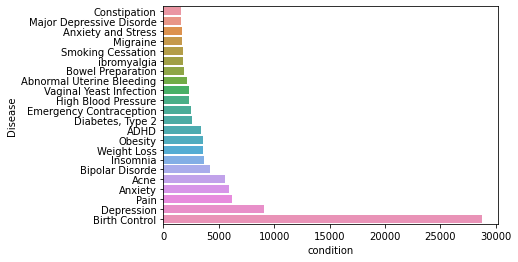

In [ ]:
train=pd.read_csv('drugsComTrain_raw.tsv',delimiter='\t')
train
train.condition.value_counts
p=train['condition'].value_counts(sort=True, ascending=True)
DF=pd.DataFrame(p)
DF.index.name = 'Disease'
DF.reset_index(inplace=True)
DF
index=DF[DF['condition']>1500]
index
sns.barplot(index['condition'],index['Disease'],orient="h")


We did not do anay analysis but still imported bag of postive word sand negative words and tried to find occureance of postive and negative word. The sum score for each post created a new label called Sentimental Score. However we did not do any analysis . We applied it for ADHD Disesese 

In [ ]:
def positiveandnegative_generator():
  path="/content/drive/My Drive/Project Text USML Part 2/positive-word-list.txt"
  import pandas as pd
  p=pd.read_csv(path)
  p1=p.to_numpy()
  p1=p1.reshape(1,-1)
  pattern=p1
  p2=pattern.tolist()
  p3=p2[0]
  print(p3)
  listnew=['impeach','welcome','adorable','no sideeffects']
  p3.append(listnew)
  path2="/content/drive/My Drive/Project Text USML Part 2/negative-word-list.txt"
  p4=pd.read_csv(path2)
  p5=p4.to_numpy()
  p5=p5.reshape(1,-1)
  pattern2=p5
  p6=pattern2.tolist()
  print(p6[0])
  return  p3,p6
p3,p6=positiveandnegative_generator()

['abound', 'abounds', 'abundance', 'abundant', 'accessable', 'accessible', 'acclaim', 'acclaimed', 'acclamation', 'accolade', 'accolades', 'accommodative', 'accomodative', 'accomplish', 'accomplished', 'accomplishment', 'accomplishments', 'accurate', 'accurately', 'achievable', 'achievement', 'achievements', 'achievible', 'acumen', 'adaptable', 'adaptive', 'adequate', 'adjustable', 'admirable', 'admirably', 'admiration', 'admire', 'admirer', 'admiring', 'admiringly', 'adorable', 'adore', 'adored', 'adorer', 'adoring', 'adoringly', 'adroit', 'adroitly', 'adulate', 'adulation', 'adulatory', 'advanced', 'advantage', 'advantageous', 'advantageously', 'advantages', 'adventuresome', 'adventurous', 'advocate', 'advocated', 'advocates', 'affability', 'affable', 'affably', 'affectation', 'affection', 'affectionate', 'affinity', 'affirm', 'affirmation', 'affirmative', 'affluence', 'affluent', 'afford', 'affordable', 'affordably', 'afordable', 'agile', 'agilely', 'agility', 'agreeable', 'agreeabl

In [ ]:
df=train[(train.condition=='ADHD')]
CrossTab1 = pd.crosstab(index=df.drugName,columns=df.condition)
print(CrossTab1)
#Lets use Medicines as a samle for ADHD
df
#Typical Senintmental Analysis based on Pattern of Words for ADHD
#
df_BirthControl=train[(train.condition=='Birth Control')]



condition                            ADHD
drugName                                 
Adderall                              160
Adderall XR                           107
Adzenys XR-ODT                         18
Amantadine                              3
Amphetamine                            44
Amphetamine / dextroamphetamine       353
Aptensio XR                             3
Armodafinil                             8
Atomoxetine                           203
Bupropion                              58
Catapres                                3
Clonidine                              24
Concerta                              190
Cylert                                  6
Daytrana                               45
Desipramine                             1
Desoxyn                                16
Desvenlafaxine                          1
Dexedrine                              49
Dexmethylphenidate                     97
Dextroamphetamine                      68
Dyanavel XR                       

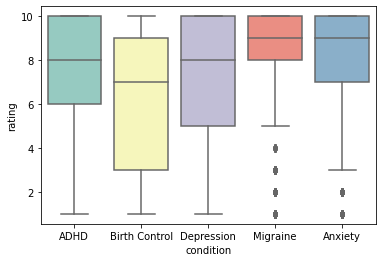

In [ ]:
train.describe()
import seaborn as sns
train2=train[(train.condition=='ADHD') | (train.condition=='Anxiety')|(train.condition=='Birth Control')|(train.condition=='Depression')|(train.condition=='Migraine')]
ax = sns.boxplot(x="condition", y="rating",data=train2, palette="Set3")

In [ ]:
!unzip "/content/drive/My Drive/Project Text USML Part 2/drugsCom_raw.zip"


Archive:  /content/drive/My Drive/Project Text USML Part 2/drugsCom_raw.zip
replace drugsComTest_raw.tsv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
def function(words):
          count=0
          for word in words:
              if word in p3: 
                count=count +1
            
          return count

def something(words):
          count2=0
          for word in words:
            if word in p6:
                count2=count2+1
          count3= function(words)-count2
          return count3

#Kept the same intendation so that function can call the other function. This function will find difference between positive words and negative words


In [ ]:
def sentimental_score_comb(df):# Define with dataframe as input 
  train=df
  import string
  list2=[]
  translator = str.maketrans('', '', string.punctuation)
  for j in range(train.shape[0]):
      X2=train.iloc[j:j+1,3]#COrpus of one lement 
      X2=X2.to_string() #corpus of strings
      X2.translate(translator)#remove punctiations
      X3=X2.split()#Split into words 
      y1=something(X3)#Functional Score based on pattern of words present /review 
      list2.append(y1)
  Y2=pd.DataFrame(list2)
  y3=Y2.values
  DF=pd.DataFrame(y3,columns=['Sentimental Score'])
  DF.shape
  train2=pd.DataFrame(train.values)# remove indexes 
  train2.columns = ['Index', 'Drug','condition','review','rating','date','usefulcount']#include new names 
  DF1=pd.concat([train2,DF],axis=1)
  return DF1


Sentimental Analysis of Test and Train Data for ADHD and Birth Control with added sentimental score based on key word presence 

In [ ]:
df_test_st=sentimental_score_comb(test_adhd)#_st means df with ADHD for test data with sentimental score 
df_test_bc=sentimental_score_comb(test_bc)# bc means df with test data for Birth Control with sentimatnal score

Sentimental Score and appending to entire data for Entire Training Data 

In [ ]:
DF12=sentimental_score_comb(train)
DF12

,Index,Drug,condition,review,rating,date,usefulcount,Sentimental Score
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,"May 20, 2012",27,0
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,"April 27, 2010",192,0
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,"December 14, 2009",17,0
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,"November 3, 2015",10,0
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,"November 27, 2016",37,0
...,...,...,...,...,...,...,...,...
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10,"May 31, 2015",125,0
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1,"November 1, 2011",34,0
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2,"March 15, 2014",35,1
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10,"September 19, 2015",79,0


In [ ]:
Q=DF12.condition=='ADHD'
Q
DF_BC=DF12[DF12.condition=='Birth Control']# DataFrame with Birth Control and Reviews 
DF_ADHD=DF12[DF12.condition=='ADHD']# Data Frame with ADHD
DF_ADHD.values
pd.DataFrame(DF_ADHD.values)#deindexed values
pd.DataFrame(DF_BC)#deindexed values

,Index,Drug,condition,review,rating,date,usefulcount,Sentimental Score
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,"December 14, 2009",17,0
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,"November 3, 2015",10,0
9,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8,"December 8, 2016",1,0
14,98494,Nexplanon,Birth Control,"""Started Nexplanon 2 months ago because I have...",3,"August 7, 2014",10,0
22,227020,Etonogestrel,Birth Control,"""Nexplanon does its job. I can have worry free...",9,"August 11, 2014",11,0
...,...,...,...,...,...,...,...,...
161268,76151,Portia,Birth Control,"""I switched to Portia 12 days ago when I start...",1,"January 28, 2014",9,0
161269,73058,Ethinyl estradiol / norethindrone,Birth Control,"""When I first starting taking Lo Loestrin Fe, ...",10,"April 20, 2015",13,0
161271,148859,Mirena,Birth Control,"""My experience: Painful insertion but I expect...",10,"January 26, 2016",4,0
161273,109111,Nexplanon,Birth Control,"""I have had the Nexplanon since Dec. 27, 2016 ...",6,"April 6, 2017",0,0


TFIDF Architecture 


One Hot Coded on Reviews. Each word gets a number and number denotes the position of 1 in one hot encoded

Keras One hot encoding . We created the architecture .Though was not used for Rating 

In [ ]:
def function_hotkeras_random(X):
  list=[]
  import string
  translator = str.maketrans('', '', string.punctuation)
  for i in range(X.shape[0]):
        X4=X.iloc[i,3]
        if type(X4)==str:
          X4.translate(translator)#remove punctuations
          X4.lower()#lower case 
          keras.preprocessing.text.text_to_word_sequence(X4, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ')#remove special charecters 
          X5=keras.preprocessing.text.one_hot(X4, 50 ,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ')
          list.append(X5)
        else:
         print(i,X4)  
  DF_output=pd.DataFrame(list)
  DF_output2= DF_output.replace(np.nan, 0)
  DFnew=pd.DataFrame(X.values)#removing the index so that merging is possible 
  DFnew.columns = ['Index', 'Drug','condition','review','rating','date','usefulcount','sentimental score']
  X2=pd.concat([DFnew,DF_output2],axis=1)
  return DF_output2,X2

In [ ]:
def get_Vocabularysize(X):# X is reviews only/Content 
 from keras.preprocessing.text import text_to_word_sequence
 from keras.preprocessing.text import Tokenizer
 from tensorflow.keras.preprocessing.sequence import pad_sequences
 text=X
 corpus=text.to_string()
 words = set(text_to_word_sequence(corpus))
 vocab_size = len(words)
 return vocab_size#Length of Vocabular

vocab=get_Vocabularysize(DF_ADHD.review)
print(vocab)

def TFIDF_reviews(X,v):#X is review only 
  from keras.preprocessing.text import Tokenizer
  from tensorflow.keras.preprocessing.sequence import pad_sequences
  token=Tokenizer(num_words=v ,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True, split=' ', char_level=False, oov_token=None)# How to create token/indexes on words 
  p=token.fit_on_texts(X)# Fit token on Corpus 
  token.word_index
# Encode  data sentences into sequences 
  train_sequences = token.texts_to_sequences(X)

# Get max training sequence length
  maxlen = max([len(x) for x in train_sequences])

# Pad the training sequences
  pad_type = 'post'
  trunc_type = 'post'
  train_padded = pad_sequences(train_sequences, padding=pad_type, truncating=trunc_type, maxlen=maxlen)
  x_tfidf = token.texts_to_matrix(X, mode='tfidf')
  return x_tfidf,train_padded


5354


In [ ]:
# Function to Create TFIDF and combine with existing data frame with sentimental score and TFIDF 
def combineddf(df):#df-refers the dataframe with sentimental index
   X=df.review#review part of DataFrame /content 
   v=get_Vocabularysize(X)#Get Vocabulary
   v=round(v)
   xf,yf=TFIDF_reviews(X,v)#OUTPUT OF TFIDF and word count (two outpus)
   X_tfidf=pd.DataFrame(xf)#dataframe of tfidf (#TF-IDF)
   new=pd.DataFrame(df.values)#REMOVING INEXING 
   new.columns = ['Index', 'Drug','condition','reviews','rating','date','usefulcount','sentimental score']
   DF_tfidf=pd.concat([new,X_tfidf],axis=1)
   return DF_tfidf

X_train_ADHD_TFIDF=combineddf(DF_ADHD)
X_test_ADHD_TFIDF= combineddf(df_test_st)#ADHD is _st
X_train_BC_TFIDF=combineddf(DF_BC)
X_test_BC_TFIDF=combineddf(df_test_bc)


One Hot Encoded Based Pre-Procesing for ADHD and Birth Control

In [ ]:
import numpy as np

x,y=function_hotkeras_random(DF_ADHD)
y
DF_ADHD_onehot=y.replace(np.nan,0)
DF_ADHD_onehot.head()
x2,y2=function_hotkeras_random(DF_BC)
DF_BC_onehot=y2.replace(np.nan,0)
DF_BC_onehot.head()

,Index,Drug,condition,review,rating,date,usefulcount,sentimental score,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,...,1112,1113,1114,1115,1116,1117,1118,1119,1120,1121,1122,1123,1124,1125,1126,1127,1128,1129,1130,1131,1132,1133,1134,1135,1136,1137,1138,1139,1140,1141,1142,1143,1144,1145,1146,1147,1148,1149,1150,1151
0,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17,0,20,5.0,38.0,23.0,5.0,44.0,34.0,6.0,26.0,39.0,34.0,33.0,37.0,36.0,11.0,25.0,11.0,44.0,21.0,32.0,42.0,38.0,22.0,3.0,30.0,40.0,41.0,14.0,39.0,47.0,47.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10,0,15,14.0,8.0,4.0,5.0,39.0,27.0,28.0,19.0,38.0,24.0,20.0,36.0,42.0,8.0,20.0,44.0,45.0,32.0,14.0,20.0,28.0,21.0,17.0,14.0,41.0,31.0,49.0,5.0,4.0,14.0,18.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8.0,"December 8, 2016",1,0,20,26.0,21.0,17.0,32.0,34.0,41.0,47.0,28.0,10.0,8.0,14.0,30.0,8.0,25.0,38.0,33.0,14.0,36.0,1.0,30.0,14.0,47.0,36.0,25.0,26.0,26.0,1.0,35.0,8.0,7.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,98494,Nexplanon,Birth Control,"""Started Nexplanon 2 months ago because I have...",3.0,"August 7, 2014",10,0,17,45.0,8.0,49.0,7.0,30.0,20.0,28.0,46.0,3.0,43.0,19.0,16.0,36.0,47.0,20.0,5.0,23.0,35.0,38.0,8.0,48.0,38.0,23.0,32.0,47.0,19.0,14.0,5.0,37.0,7.0,38.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,227020,Etonogestrel,Birth Control,"""Nexplanon does its job. I can have worry free...",9.0,"August 11, 2014",11,0,45,29.0,37.0,20.0,20.0,5.0,28.0,39.0,21.0,37.0,32.0,2.0,38.0,14.0,19.0,8.0,21.0,28.0,22.0,44.0,37.0,22.0,6.0,22.0,25.0,19.0,15.0,37.0,22.0,25.0,21.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from google.colab import files# Download one hot coded data hot 

DF_BC_onehot.to_csv('dfbchot.csv')
files.download('dfbchot.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Finding Principal Component Analysis using Self Developed Function for One Hot coded Keras Values 
DF_ADHD_onehot_values=DF_ADHD_onehot.iloc[:,8:].values
DF_ADHD_onehot_values
DF_BC_onehot_values=DF_BC_onehot.iloc[:,8:].values
DF_BC_onehot_values

array([[20.,  5., 38., ...,  0.,  0.,  0.],
       [15., 14.,  8., ...,  0.,  0.,  0.],
       [20., 26., 21., ...,  0.,  0.,  0.],
       ...,
       [ 8., 25., 16., ...,  0.,  0.,  0.],
       [20., 28., 26., ...,  0.,  0.,  0.],
       [15., 17., 23., ...,  0.,  0.,  0.]])

In [ ]:
def SVD_Normalization(A):#Normalization for each column 
  Y=np.zeros([A.shape[0],A.shape[1]])
  for i in range(A.shape[1]):
    Y[:,i]=(A[:,i]-np.mean(A[:,i]))

  u,v,w=np.linalg.svd(Y)
  I=np.identity(2)
  m=I*v[:2]
  #Information in the 2 signular vectors# Values in the Projection Matrix  
  Z=np.dot(Y,w.T)#Projected Data on 2 Right Singular Vectors #X.V
  return Z,w

In [ ]:
m=SVD_Normalization(DF_ADHD_onehot_values)[0]
m.shape
q=SVD_Normalization(DF_BC_onehot_values)[0]
# Two Principal Components and there are two axis and their values 

#Predict Rating of ADHD Patients, Birth Control Patients-So that we can use the best model for Test Data 
# Create 3 Major Eigen Vectors that represents the corpus 
#Create Clustering of these reviews and compare with Eigen vectors for ADHD disease
#Create TF-IDF of each comment 

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import pandas as pd
import re
import numpy as np


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer= TfidfVectorizer()


In [ ]:
#how to train one hot keras model

In [ ]:
!pip install texthero


     |████████████████████████████████| 1.5 MB 7.6 MB/s 
     |████████████████████████████████| 241 kB 64.9 MB/s 
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


Now we use a more structured and robust approach for Cleaning the Corpus using Text Hero. We then re create a TFIDF using this structured approach for test and train Data 

In [ ]:
#Now we need to improve the data Quality by pre processing it by improving the corpus. 
#Towards this the text hero pipe line was easy to implement 

def cleantext(textcolumn):
 import texthero as hero
 from texthero import preprocessing
 import re
 X=textcolumn
 custom_pipeline = [preprocessing.fillna,
                   preprocessing.lowercase,
                   preprocessing.remove_whitespace,
                   preprocessing.remove_diacritics,
                   preprocessing.remove_punctuation,
                   preprocessing.remove_brackets,
                   preprocessing.remove_stopwords,
                   preprocessing.remove_digits]
 Xm= hero.clean(X, custom_pipeline)
 Xm= [n.replace('{','') for n in Xm]
 Xm= [n.replace('}','') for n in Xm]
 Xm =[n.replace('(','') for n in Xm]
 Xm= [n.replace(')','') for n in Xm]
 Xm=[re.sub(r"[A-Za-z]+\d+|\d+[A-Za-z]+",'',i).strip() for i in Xm]#removing words with numberslike 100mg,16yrs etc
 return Xm

Corpus Cleaning of Test Data Reviews after Sentimental Pattern Score 

In [ ]:
cleanedcorpus_test=cleantext(df_test_st.review)# Test Data Corpus of ADHD test review 
cleanedcorpus_test2=cleantext(df_test_bc.review)#Test Data Corpus of Birth Control Review 

In [ ]:
cleanedcorpus_train2=cleantext(DF_BC.review)#Train review for Birth Control
cleanedcorpus_train2_sample=cleantext(DF_BC.review[:1000])

In [ ]:
cleanedcorpus_train_ADHD=cleantext(DF_ADHD.review)
cleanedcorpus_train_ADHD
cleanedcorpus_train_BC=cleantext(DF_BC.review)

Function of TFIDF in more structured Approach . This was used in Training the ratings Score 

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer#Bag of words modek

def TFIDF_text(cleanedcorpusdf):
    countvectorizer = CountVectorizer(analyzer= 'word', stop_words='english')
    tfidfvectorizer = TfidfVectorizer(analyzer='word',stop_words= 'english')
    # convert the reviews  into a matrix
    count_wm = countvectorizer.fit_transform(cleanedcorpusdf)# this creates a list of review number and frequency of index of words in that particular 
    tfidf_wm = tfidfvectorizer.fit_transform(cleanedcorpusdf)# this creates a  matrix of TFIDF 
    print(count_wm.toarray())
    #retrieve the terms found in the corpora
    # if we take same parameters on both Classes(CountVectorizer and TfidfVectorizer) , it will give same output of get_feature_names() methods)
    #count_tokens = tfidfvectorizer.get_feature_names() # no difference
    count_tokens = countvectorizer.get_feature_names()# Feaures/ Words names
    tfidf_tokens = tfidfvectorizer.get_feature_names()
    print(tfidf_tokens)
    df_countvect = pd.DataFrame(data = count_wm.toarray(),columns = count_tokens)
    df_tfidfvect = pd.DataFrame(data = tfidf_wm.toarray(),columns = tfidf_tokens)
    print("Count Vectorizer\n")
    print(df_countvect)
    print("\nTD-IDF Vectorizer\n")
    print(df_tfidfvect)
    return df_tfidfvect,df_countvect

1. Count vectorizer first first tokenizes each word and we can think them as index number of entire corpus
2. We then count the presence of that word(or index number) in that particular review of the disease or medicine .This is denoted by $tf(t,r)$.Example $tf(aadd,r0)=0$ where r0 is the first review of ADHD extracted reviews.$tf(t,r)$=$\sum_{i=0}^Vf(x,r)$ where x is the index and $f(x,t)$={1 if x=t else 0}

3. Now we multiply $tf(t,r)$*$idf(t)$ where $idf(t)$=  $ log(D)/(1+t:d;$t$ in d)$
D=# Total Number of Reviews
t:d means  number of times term belongs to document d


TFIDF for Cleaned Corpus data for test and train 

In [ ]:
idf,tf=TFIDF_text(cleanedcorpus_train_ADHD)#TFIDF & Count Vectorizer 

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['aadd', 'ab', 'abilify', 'abilities', 'ability', 'abit', 'able', 'ablitly', 'abnormal', 'abrasions', 'abruptly', 'absence', 'absent', 'absolute', 'absolutely', 'absorb', 'absorbed', 'abstained', 'abstract', 'absurd', 'abt', 'abundant', 'abuse', 'abused', 'abuses', 'abusing', 'abusive', 'abut', 'academic', 'academically', 'academics', 'accelerated', 'accept', 'acceptable', 'acceptance', 'accepted', 'access', 'accessing', 'accident', 'accidentally', 'accidents', 'accomplish', 'accomplished', 'accomplishment', 'accoms', 'according', 'accordingly', 'account', 'accountability', 'accumulated', 'accustomed', 'ace', 'ache', 'ached', 'aches', 'achieve', 'achieved', 'achievement', 'achievements', 'achiever', 'achieving', 'achy', 'acid', 'acing', 'acknowledge', 'acne', 'act', 'actavis', 'acting', 'action', 'actions', 'activas', 'active', 'actively', 'activie', 'activis', 'activ

In [ ]:
idf_test,tf_test=TFIDF_text(cleanedcorpus_test)#ADHD tfidf & word counts 
idf_test2,tf_test2=TFIDF_text(cleanedcorpus_test2)#BC TFIDF & Word counts

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['aadd', 'abilify', 'abilities', 'ability', 'able', 'abnormal', 'aboring', 'abrasions', 'abruptly', 'absence', 'absent', 'absolute', 'absolutely', 'absorb', 'abstained', 'absurd', 'abuse', 'abused', 'abusing', 'abusive', 'academic', 'academically', 'academics', 'accelerated', 'accept', 'acceptable', 'accepted', 'access', 'accidentally', 'accidents', 'accomplish', 'accomplished', 'accomplishments', 'according', 'accordingly', 'account', 'accumulated', 'accustomed', 'ace', 'ache', 'ached', 'aches', 'achieve', 'achieved', 'achievement', 'achiever', 'achieving', 'achy', 'acid', 'acknowledge', 'acne', 'act', 'acting', 'action', 'actions', 'activas', 'active', 'activis', 'activities', 'activity', 'actors', 'acts', 'actual', 'actually', 'ad', 'adapt', 'adapted', 'add', 'added', 'adderal', 'adderall', 'adderral', 'adderrall', 'addict', 'addicted', 'addiction', 'addictions', '

In [ ]:
tfidf_bc,tf_bc=TFIDF_text(cleanedcorpus_train_BC)#sampling only 10000  for birht control

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['17', 'aa', 'aaand', 'ab', 'abandon', 'abd', 'abdomen', 'abdomin', 'abdominal', 'abdominals', 'abdomonal', 'abe', 'abhorrent', 'abided', 'abile', 'ability', 'abit', 'abiut', 'ablation', 'able', 'abnormal', 'abnormalities', 'abnormality', 'abnormally', 'abodinal', 'abornmal', 'aborting', 'abortion', 'abortions', 'abrasions', 'abroad', 'abs', 'abscesses', 'absence', 'absent', 'absentees', 'absolute', 'absolutelllly', 'absolutely', 'absolutley', 'absolutly', 'absorb', 'absorbed', 'absorbency', 'absorbent', 'absorbing', 'absorbs', 'absorption', 'abstain', 'abstenance', 'abstinence', 'abstinent', 'absurd', 'abt', 'abundance', 'abundant', 'abuout', 'abuse', 'abusing', 'abusive', 'abut', 'ac', 'aca', 'academically', 'academics', 'acared', 'accept', 'acceptable', 'acceptance', 'accepted', 'accepting', 'accepts', 'access', 'accessible', 'accident', 'accidental', 'accidentally

Persona Creatuon had two features comorbidity and Medicine Trial

# Persona Creation

In [ ]:
import spacy
from spacy.matcher import Matcher

nlp = spacy.load("en_core_web_sm")
matcher = Matcher(nlp.vocab)
# Add match ID "HelloWorld" with no callback and one pattern
pattern = [{"LOWER": "hello"}, {"IS_PUNCT": True}, {"LOWER": "world"}]
matcher.add("HelloWorld", None, pattern)

doc = nlp("Hello, world! Hello world!")
matches = matcher(doc)
for match_id, start, end in matches:
    string_id = nlp.vocab.strings[match_id]  # Get string representation
    span = doc[start:end]  # The matched span
    print(match_id, string_id, start, end, span.text)

15578876784678163569 HelloWorld 0 3 Hello, world


#Persona identification
Identifies comorbodities in Drugs.com

In [ ]:
#import spacy
#Persona Function -Just a random method 
nlp = spacy.load('en_core_web_sm')

from spacy.matcher import Matcher
m_tool = Matcher(nlp.vocab)
nlp
m_tool

sentence = 'The quick-brown-fox jumps over the lazy dog. The quick brown fox eats well. \
               the quickbrownfox is dead. the dog misses the quick brownfox'

introduction_doc = nlp(sentence)
p1 = [{'LOWER': 'diabetes'}]
p2 = [{'LOWER': 'migraine'}, {'IS_PUNCT': True}, {'LOWER': 'hypertension'}, {'IS_PUNCT': True}, {'LOWER': 'diabetes'}]
p3 = [{'LOWER': 'quick'}, {'LOWER': 'brown'}, {'LOWER': 'fox'}]
p4 =  [{'LOWER': 'quick'}, {'LOWER': 'brownfox'}]
p5=[{'LOWER': 'heartdisease'}]
p6=[{'LOWER': 'migraine'}]
p7 =[{'LOWER': 'hypertension'}]
p8=[{'LOWER':'insomnia'}]
m_tool.add('QBF', None, p1, p2, p3, p4,p5,p6,p7,p8)

phrase_matches = m_tool(introduction_doc)
print(phrase_matches )

[(12825528024649263697, 13, 16), (12825528024649263697, 29, 31)]


In [ ]:
#X is data object and Function is to identify Personas with Comorbidity 
def persona_identification(X):
  match=[]
  for i in X:
    doc=nlp(i)
    p1 = [{'LOWER': 'diabetes'}]
    p2 = [{'LOWER': 'migraine'}, {'IS_PUNCT': True}, {'LOWER': 'hypertension'}, {'IS_PUNCT': True}, {'LOWER': 'diabetes'}]
    p3=[{'LOWER': 'heartdisease'}]
    p4=[{'LOWER': 'migraine'}]
    p5 =[{'LOWER': 'hypertension'}]
    p5=[{'LOWER':'insomnia'}]
    p6=[{'LOWER':'anxiety'}]
    m_tool.add('QBF', None, p1, p2, p3, p4,p5,p6)
    phrase_matches = m_tool(doc)
    match.append(phrase_matches)
  return phrase_matches






In [ ]:
# Persona 2- Lets label individuals who have switched medicines once. I personally believe individuals who have tried more than one medicine are more likely to be successful in 
# medicine than not

In [ ]:
# Original Data as corpus may break the workds  
def persona_comorbidity_heart (X):
 match=[]
 for i in X:
    doc=nlp(i)
    p1 = [{'LOWER': 'diabetes'}]
    p2 =[{'LOWER': 'hypertension'}]
    p3=[{'LOWER':'cholestrol'}]
    m_tool.add('QBF', None, p1, p2, p3)
    phrase_matches = m_tool(doc)
    match.append(phrase_matches)
 return match   

#Lets do Persona for ADHD

1.   Heart /Comorbidity 



In [ ]:
match=persona_comorbidity_heart(DF_ADHD.review)# Persona on Training Data for ADHD Review 

Persona  for BIRTH CONTROL
1. Heart/Comorbidity 

In [ ]:
#Since we are going line by line we will take data set of 15000
#Personal
from timeit import default_timer as timer
start = timer()
match_bc=persona_comorbidity_heart(DF_BC.review[:500])
end = timer()
print(end - start) 



94.11168465799983


In [ ]:
match_bc_test=persona_comorbidity_heart(DF_BC.review[:500])#Persona on Test data for BC review
def comorbidity(m):# Function to find occurrences 
  y=[]
  for i in m:
      if len(i)==0:
         x=0
      else:
        x=1
      y.append(x)  
  return y 
q=comorbidity(match)#list 1 for adhd 


In [ ]:
q_bc_train=comorbidity(match_bc)#list2 /Persona  1 for bc 

In [ ]:


def comorbidity(m):# Function to find occurrences 
  y=[]
  for i in m:
      if len(i)==0:
         x=0
      else:
        x=1
      y.append(x)  
  return y 
q=comorbidity(match)#list 1 for adhd 


In [ ]:
q_bc_train=comorbidity(match_bc)#list2 /Persona  1 for birth control

In [ ]:
q4=comorbidity(match)
import pandas as pd
DF_ADHD_Comorbid=pd.DataFrame(q4)
DF_ADHD_Comorbid.rename(columns = {0:'Comorbidity Feature'}, inplace=True )# Comorbidity data frame
print(DF_ADHD_Comorbid)
from google.colab import files

Temp_DF=pd.DataFrame(DF_ADHD.values)#Remvoved Indexes so that we can joun
DF_new2=pd.concat([Temp_DF,DF_ADHD_Comorbid],axis=1,join='outer')#Dataframe with comorbid and original DF

DF_ADHD_Comorbid_TFIDF=pd.concat([DF_new2,idf],axis=1,join='outer')
DF_ADHD_Comorbid_TFIDF.head()
column_indices = [0,1,2,3,4,5,6,7,8]
old_names = DF_ADHD_Comorbid_TFIDF.columns[column_indices]
new_names = ['Index', 'Drug','condition','reviews','rating','date','usefulcount','sentimental score']
DF_ADHD_Comorbid_TFIDF.rename(columns=dict(zip(old_names, new_names)), inplace=True)
DF_ADHD_Comorbid_TFIDF.head()


      Comorbidity Feature
0                       0
1                       1
2                       0
3                       0
4                       0
...                   ...
3378                    0
3379                    1
3380                    0
3381                    1
3382                    0

[3383 rows x 1 columns]


,Index,Drug,condition,reviews,rating,date,usefulcount,sentimental score,Comorbidity Feature,aadd,ab,abilify,abilities,ability,abit,able,ablitly,abnormal,abrasions,abruptly,absence,absent,absolute,absolutely,absorb,absorbed,abstained,abstract,absurd,abt,abundant,abuse,abused,abuses,abusing,abusive,abut,academic,academically,academics,...,yawns,yay,yeah,year,years,yell,yelled,yelling,yellow,yes,yesterday,yielded,yikes,yo,yook,york,young,younger,youngest,yous,yr,yro,yrs,yuck,yup,zaps,zenzedi,zero,zeroed,zithromax,zoloft,zombie,zombied,zombified,zombish,zone,zoned,zoning,zoplicone,zyprexa
0,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,"April 27, 2010",192,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,78563,Daytrana,ADHD,"""Hi all, My son who is 12 was diagnosed when h...",10,"January 12, 2017",11,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.084809,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.070873,0.065446,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,135645,Intuniv,ADHD,"""Intuniv did not work for my son; he was bounc...",1,"July 21, 2011",23,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,61002,Focalin,ADHD,"""My 9 year old son has been on various medicin...",9,"January 31, 2010",48,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.072638,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,37533,Vyvanse,ADHD,"""Today was my first day taking Vyvanse and wow...",9,"August 31, 2011",11,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.064935,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Persona Feature Creator for Second Medicine Trial 

In [ ]:
def persona_second_medicine (X):
 match=[]
 for i in X:
    doc=nlp(i)
    p1 = [{'LOWER': 'changed'}]
    p2 = [{'LOWER': 'changed '}, {'IS_PUNCT': True}, {'LOWER': 'to'}, {'IS_PUNCT': True}, {'LOWER':'medicine'}]
    p3=[{'LOWER':'second'}]
    p4=[{'LOWER':'new'},{'IS_PUNCT': True}, {'LOWER': 'drug'}]
    p5=[{'LOWER':'third'}]
    m_tool.add('QBF', None, p1, p2, p3)
    phrase_matches = m_tool(doc)
    match.append(phrase_matches)
 return match 

We use the above function for ADHD Reviews -all training data 

In [ ]:
match=persona_second_medicine(DF_ADHD.review)
q5=comorbidity(match)
import pandas as pd
DF_ADHD_Med=pd.DataFrame(q5)
DF_ADHD_Med.rename(columns = {0:'Second_Trial Persona'}, inplace=True )
from google.colab import files

# e.g. save pandas output as csv
DF_ADHD_Med.to_csv('example2.csv')

# e.g. save pandas output as csv
DF_Final_TFIDF=pd.concat([DF_ADHD_Comorbid_TFIDF,DF_ADHD_Med],axis=1,join='outer')
DF_Final_TFIDF.head()
DF_ADHD_Comorbid_TFIDF.to_csv('Final.csv')
files.download('Final.csv')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Then we use same Persona for Birth Control 

In [ ]:
mach_pers_bc=persona_second_medicine(DF_BC.review[:500])# Persona for Second Medication 
q_bc=comorbidity(mach_pers_bc)#Check Count 

In [ ]:
DF_BC_Comorbid=pd.DataFrame(q_bc_train[:500])# converting results of matching into data frame 
DF_BC_Comorbid.rename(columns = {0:'Persona Type1'}, inplace=True )
DF_BC_Comorbid
Temp_DF_BC=pd.DataFrame(DF_BC.iloc[:500,:])#Remvoved Indexes so that we can join for only 10,0000 observations 
Temp_DF_BC['Comorbidity']=q_bc_train[:500]
Temp_DF_BC


,Index,Drug,condition,review,rating,date,usefulcount,Sentimental Score,Comorbidity
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,"December 14, 2009",17,0,0
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,"November 3, 2015",10,0,0
9,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8,"December 8, 2016",1,0,0
14,98494,Nexplanon,Birth Control,"""Started Nexplanon 2 months ago because I have...",3,"August 7, 2014",10,0,0
22,227020,Etonogestrel,Birth Control,"""Nexplanon does its job. I can have worry free...",9,"August 11, 2014",11,0,0
...,...,...,...,...,...,...,...,...,...
2776,99163,Lutera,Birth Control,"""I&#039;ve been taking Lutera for a year and I...",7,"March 15, 2012",5,0,0
2782,107695,Implanon,Birth Control,"""I have had Implanon since I had my daughter i...",10,"May 2, 2010",6,0,0
2786,84321,Ethinyl estradiol / norgestimate,Birth Control,"""I had clean, clear skin before I started taki...",7,"January 4, 2017",4,1,0
2792,220660,Loestrin 24 Fe,Birth Control,"""I have been on Loestrin 24 for about 6 months...",3,"January 27, 2011",2,0,0


In [ ]:
bc_secondpersona=persona_second_medicine(DF_BC.review[:500])

In [ ]:
second_bc=comorbidity(bc_secondpersona)
Temp_DF_BC['Medicine Trials']=second_bc
Temp_DF_BC


,Index,Drug,condition,review,rating,date,usefulcount,Sentimental Score,Comorbidity,Medicine Trials
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,"December 14, 2009",17,0,0,1
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,"November 3, 2015",10,0,0,0
9,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8,"December 8, 2016",1,0,0,1
14,98494,Nexplanon,Birth Control,"""Started Nexplanon 2 months ago because I have...",3,"August 7, 2014",10,0,0,0
22,227020,Etonogestrel,Birth Control,"""Nexplanon does its job. I can have worry free...",9,"August 11, 2014",11,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2776,99163,Lutera,Birth Control,"""I&#039;ve been taking Lutera for a year and I...",7,"March 15, 2012",5,0,0,0
2782,107695,Implanon,Birth Control,"""I have had Implanon since I had my daughter i...",10,"May 2, 2010",6,0,0,0
2786,84321,Ethinyl estradiol / norgestimate,Birth Control,"""I had clean, clear skin before I started taki...",7,"January 4, 2017",4,1,0,0
2792,220660,Loestrin 24 Fe,Birth Control,"""I have been on Loestrin 24 for about 6 months...",3,"January 27, 2011",2,0,0,0


In [ ]:
BC_TFidf_sample=tfidf_bc.iloc[:500,]# Sparse Matrix for TFIDF_BC for first 500 users 
BC_sample=pd.DataFrame(Temp_DF_BC.values)
DF_BC_TFIDF_sample=pd.concat([BC_sample,BC_TFidf_sample],axis=1,join='outer')
DF_BC_TFIDF_sample# names disappeared 



,0,1,2,3,4,5,6,7,8,9,17,aa,aaand,ab,abandon,abd,abdomen,abdomin,abdominal,abdominals,abdomonal,abe,abhorrent,abided,abile,ability,abit,abiut,ablation,able,abnormal,abnormalities,abnormality,abnormally,abodinal,abornmal,aborting,abortion,abortions,abrasions,...,yogi,yogurt,yons,young,younger,youngest,youre,youtube,yoyo,yr,yrs,ys,yuck,yucky,yup,yupeee,zapped,zaps,zarah,zarrah,zenchent,zero,zest,zilch,zinc,zip,zit,zits,zoelly,zofran,zoloft,zombie,zomby,zone,zoned,zones,zoom,zovia,zulane,zumba
0,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,"December 14, 2009",17,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,"November 3, 2015",10,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8,"December 8, 2016",1,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.193405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,98494,Nexplanon,Birth Control,"""Started Nexplanon 2 months ago because I have...",3,"August 7, 2014",10,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,227020,Etonogestrel,Birth Control,"""Nexplanon does its job. I can have worry free...",9,"August 11, 2014",11,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,99163,Lutera,Birth Control,"""I&#039;ve been taking Lutera for a year and I...",7,"March 15, 2012",5,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
496,107695,Implanon,Birth Control,"""I have had Implanon since I had my daughter i...",10,"May 2, 2010",6,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
497,84321,Ethinyl estradiol / norgestimate,Birth Control,"""I had clean, clear skin before I started taki...",7,"January 4, 2017",4,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [ ]:
BC_TFidf_sample=tfidf_bc.iloc[:500,]# Sparse Matrix for TFIDF_BC for first 500 users 
BC_sample=pd.DataFrame(Temp_DF_BC.values)
DF_BC_TFIDF_sample=pd.concat([BC_sample,BC_TFidf_sample],axis=1,join='outer')
DF_BC_TFIDF_sample# names disappeared 
column_indices = [0,1,2,3,4,5,6,7,8,9]#indices
DF_BC_TFIDF_sample

,0,1,2,3,4,5,6,7,8,9,17,aa,aaand,ab,abandon,abd,abdomen,abdomin,abdominal,abdominals,abdomonal,abe,abhorrent,abided,abile,ability,abit,abiut,ablation,able,abnormal,abnormalities,abnormality,abnormally,abodinal,abornmal,aborting,abortion,abortions,abrasions,...,yogi,yogurt,yons,young,younger,youngest,youre,youtube,yoyo,yr,yrs,ys,yuck,yucky,yup,yupeee,zapped,zaps,zarah,zarrah,zenchent,zero,zest,zilch,zinc,zip,zit,zits,zoelly,zofran,zoloft,zombie,zomby,zone,zoned,zones,zoom,zovia,zulane,zumba
0,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,"December 14, 2009",17,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,"November 3, 2015",10,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8,"December 8, 2016",1,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.193405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,98494,Nexplanon,Birth Control,"""Started Nexplanon 2 months ago because I have...",3,"August 7, 2014",10,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,227020,Etonogestrel,Birth Control,"""Nexplanon does its job. I can have worry free...",9,"August 11, 2014",11,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,99163,Lutera,Birth Control,"""I&#039;ve been taking Lutera for a year and I...",7,"March 15, 2012",5,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
496,107695,Implanon,Birth Control,"""I have had Implanon since I had my daughter i...",10,"May 2, 2010",6,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
497,84321,Ethinyl estradiol / norgestimate,Birth Control,"""I had clean, clear skin before I started taki...",7,"January 4, 2017",4,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [ ]:
column_indices = [0,1,2,3,4,5,6,7,8,9]#indices
old_names = DF_BC_TFIDF_sample[column_indices]
new_names = ['Index', 'Drug','condition','reviews','rating','date','usefulcount','sentimental score','Comorbidity','Medical Trial']
DF_BC_TFIDF_sample.rename(columns=dict(zip(old_names, new_names)), inplace=True)
DF_BC_TFIDF_sample
DF_BC_TFIDF_sample.to_csv('Final_BC_sample.csv')
files.download('Final_BC_sample.csv')# Birth Control Disease Sample 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Training Data with Persona Generation  for ADHD Disease only 

In [ ]:
from google.colab import files
#
DF_Final_TFIDF.to_csv('Finalv4.csv')
files.download('Finalv4.csv')
DF_Final_TFIDF.head()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Index,Drug,condition,reviews,rating,date,usefulcount,sentimental score,Comorbidity Feature,aadd,ab,abilify,abilities,ability,abit,able,ablitly,abnormal,abrasions,abruptly,absence,absent,absolute,absolutely,absorb,absorbed,abstained,abstract,absurd,abt,abundant,abuse,abused,abuses,abusing,abusive,abut,academic,academically,academics,...,yay,yeah,year,years,yell,yelled,yelling,yellow,yes,yesterday,yielded,yikes,yo,yook,york,young,younger,youngest,yous,yr,yro,yrs,yuck,yup,zaps,zenzedi,zero,zeroed,zithromax,zoloft,zombie,zombied,zombified,zombish,zone,zoned,zoning,zoplicone,zyprexa,Second_Trial Persona
0,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,"April 27, 2010",192,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,78563,Daytrana,ADHD,"""Hi all, My son who is 12 was diagnosed when h...",10,"January 12, 2017",11,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.084809,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.070873,0.065446,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,135645,Intuniv,ADHD,"""Intuniv did not work for my son; he was bounc...",1,"July 21, 2011",23,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,61002,Focalin,ADHD,"""My 9 year old son has been on various medicin...",9,"January 31, 2010",48,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.072638,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,37533,Vyvanse,ADHD,"""Today was my first day taking Vyvanse and wow...",9,"August 31, 2011",11,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.064935,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
n=DF_Final_TFIDF.iloc[:,6918]
n
df_test_st.head()


,Index,Drug,condition,review,rating,date,usefulcount,Sentimental Score
0,13407,Amphetamine / dextroamphetamine,ADHD,"""Yes, this medication does work wonders, at fi...",2,"May 20, 2015",57,1
1,41991,Clonidine,ADHD,"""My 5 year old son was diagnosed with ADHD jus...",10,"April 30, 2011",159,0
2,225793,Bupropion,ADHD,"""I&#039;ve been on Wellbutrin for over a year ...",10,"June 15, 2011",224,0
3,37351,Vyvanse,ADHD,"""56 yrs old. Tried Ritilin 15 years ago but st...",8,"July 6, 2015",36,0
4,37359,Vyvanse,ADHD,"""I had my college finals coming up and I could...",8,"May 1, 2015",28,0


In [ ]:
match2=persona_comorbidity_heart(df_test_st.review[:1000])

Persona Generation for Test Data for ADHD Disease 

In [ ]:
#now using matching  for test data FOR ADHD
q_test=comorbidity(match2)#List of 1,0
DF_ADHD_Comorbid_test=pd.DataFrame(q_test)# Persona#Data Frame of Personas
DF_ADHD_Comorbid_test.rename(columns = {0:'Comorbid Persona'}, inplace=True )# Persona Data Frame with Persona Type
Temp_DF=pd.DataFrame(df_test_st.values)#Removed Indexes 
DF_new2=pd.concat([Temp_DF,DF_ADHD_Comorbid_test],axis=1,join='outer')#concat original and personality type by columns 

DF_ADHD_Comorbid_TFIDF_test=pd.concat([DF_new2,idf_test],axis=1,join='outer')# Concat all -original,personality and TFIDF 
DF_ADHD_Comorbid_TFIDF_test.head()
column_indices = [0,1,2,3,4,5,6,7,8]
old_names = DF_ADHD_Comorbid_TFIDF_test.columns[column_indices]
new_names = ['Index', 'Drug','condition','reviews','rating','date','usefulcount','sentimental score']
DF_ADHD_Comorbid_TFIDF_test.rename(columns=dict(zip(old_names, new_names)), inplace=True)
DF_ADHD_Comorbid_TFIDF_test.head()

,Index,Drug,condition,reviews,rating,date,usefulcount,sentimental score,Comorbid Persona,aadd,abilify,abilities,ability,able,abnormal,aboring,abrasions,abruptly,absence,absent,absolute,absolutely,absorb,abstained,absurd,abuse,abused,abusing,abusive,academic,academically,academics,accelerated,accept,acceptable,accepted,access,accidentally,accidents,accomplish,...,written,wrong,wrote,xanax,xl,xr,xrays,yeah,year,years,yell,yelling,yellow,yellowish,yes,yesterday,yielded,yikes,yo,yoga,yook,york,young,younger,youngest,yr,yro,yrs,zaps,zero,zeroed,zoloft,zombie,zombied,zombies,zombified,zombish,zone,zoned,zones
0,13407,Amphetamine / dextroamphetamine,ADHD,"""Yes, this medication does work wonders, at fi...",2,"May 20, 2015",57,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.067395,0.064163,0.0,0.0,0.0,0.0,0.138379,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,41991,Clonidine,ADHD,"""My 5 year old son was diagnosed with ADHD jus...",10,"April 30, 2011",159,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.068887,0.000000,0.0,0.0,0.0,0.0,0.000000,0.150403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,225793,Bupropion,ADHD,"""I&#039;ve been on Wellbutrin for over a year ...",10,"June 15, 2011",224,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.071795,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.156751,0.131812,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,37351,Vyvanse,ADHD,"""56 yrs old. Tried Ritilin 15 years ago but st...",8,"July 6, 2015",36,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.089300,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.172211,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,37359,Vyvanse,ADHD,"""I had my college finals coming up and I could...",8,"May 1, 2015",28,0,0.0,0.0,0.0,0.0,0.0,0.125294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
DF_ADHD_Comorbid_TFIDF_test.head()

,Index,Drug,condition,reviews,rating,date,usefulcount,sentimental score,Comorbid Persona,aadd,abilify,abilities,ability,able,abnormal,aboring,abrasions,abruptly,absence,absent,absolute,absolutely,absorb,abstained,absurd,abuse,abused,abusing,abusive,academic,academically,academics,accelerated,accept,acceptable,accepted,access,accidentally,accidents,accomplish,...,written,wrong,wrote,xanax,xl,xr,xrays,yeah,year,years,yell,yelling,yellow,yellowish,yes,yesterday,yielded,yikes,yo,yoga,yook,york,young,younger,youngest,yr,yro,yrs,zaps,zero,zeroed,zoloft,zombie,zombied,zombies,zombified,zombish,zone,zoned,zones
0,13407,Amphetamine / dextroamphetamine,ADHD,"""Yes, this medication does work wonders, at fi...",2,"May 20, 2015",57,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.067395,0.064163,0.0,0.0,0.0,0.0,0.138379,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,41991,Clonidine,ADHD,"""My 5 year old son was diagnosed with ADHD jus...",10,"April 30, 2011",159,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.068887,0.000000,0.0,0.0,0.0,0.0,0.000000,0.150403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,225793,Bupropion,ADHD,"""I&#039;ve been on Wellbutrin for over a year ...",10,"June 15, 2011",224,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.071795,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.156751,0.131812,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,37351,Vyvanse,ADHD,"""56 yrs old. Tried Ritilin 15 years ago but st...",8,"July 6, 2015",36,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.089300,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.172211,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,37359,Vyvanse,ADHD,"""I had my college finals coming up and I could...",8,"May 1, 2015",28,0,0.0,0.0,0.0,0.0,0.0,0.125294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Now doing for persona 2 
match3=persona_second_medicine(df_test_st.review)# test for bc disease 
list3=comorbidity(match3)#comoribidy persona feature 
DF_temp=pd.DataFrame(list3)
DF_temp.rename(columns={0:"Second Medicine"},inplace=True)
DF_ADHD_test_TFIDF_Final=pd.concat([DF_ADHD_Comorbid_TFIDF_test,DF_temp],axis=1)#Final Test Data Frame with TFIDF and personas
DF_ADHD_test_TFIDF_Final.head()


NameError: ignored

-MANDATORY TO RUN CODE TILL HERE AND THEN CAN BREAK DIRECTLY TO EXPORT 

Test data with persona 

In [ ]:
list3=comorbidity(match3)#comoribidy persona feature 
DF_temp=pd.DataFrame(list3)
DF_temp.rename(columns={0:"Second Medicine"},inplace=True)
DF_ADHD_test_TFIDF_Final=pd.concat([DF_ADHD_Comorbid_TFIDF_test,DF_temp],axis=1)#Final Test Data Frame with TFIDF and personas
DF_ADHD_test_TFIDF_Final.head()

,Index,Drug,condition,reviews,rating,date,usefulcount,sentimental score,Comorbid Persona,aadd,abilify,abilities,ability,able,abnormal,aboring,abrasions,abruptly,absence,absent,absolute,absolutely,absorb,abstained,absurd,abuse,abused,abusing,abusive,academic,academically,academics,accelerated,accept,acceptable,accepted,access,accidentally,accidents,accomplish,...,wrong,wrote,xanax,xl,xr,xrays,yeah,year,years,yell,yelling,yellow,yellowish,yes,yesterday,yielded,yikes,yo,yoga,yook,york,young,younger,youngest,yr,yro,yrs,zaps,zero,zeroed,zoloft,zombie,zombied,zombies,zombified,zombish,zone,zoned,zones,Second Medicine
0,13407,Amphetamine / dextroamphetamine,ADHD,"""Yes, this medication does work wonders, at fi...",2,"May 20, 2015",57,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.067395,0.064163,0.0,0.0,0.0,0.0,0.138379,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,41991,Clonidine,ADHD,"""My 5 year old son was diagnosed with ADHD jus...",10,"April 30, 2011",159,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.068887,0.000000,0.0,0.0,0.0,0.0,0.000000,0.150403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,225793,Bupropion,ADHD,"""I&#039;ve been on Wellbutrin for over a year ...",10,"June 15, 2011",224,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.071795,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.156751,0.131812,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,37351,Vyvanse,ADHD,"""56 yrs old. Tried Ritilin 15 years ago but st...",8,"July 6, 2015",36,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.089300,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.172211,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,37359,Vyvanse,ADHD,"""I had my college finals coming up and I could...",8,"May 1, 2015",28,0,0.0,0.0,0.0,0.0,0.0,0.125294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
DF_ADHD_test_TFIDF_Final.to_csv("Final_test_TFIDF.csv")
files.download('Final_test_TFIDF.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
DF_ADHD_test_TFIDF_Final.head()# Two persona Feature Added -Second Medicine & Comorbidity in test data 

,Index,Drug,condition,reviews,rating,date,usefulcount,sentimental score,Comorbid Persona,aadd,abilify,abilities,ability,able,abnormal,aboring,abrasions,abruptly,absence,absent,absolute,absolutely,absorb,abstained,absurd,abuse,abused,abusing,abusive,academic,academically,academics,accelerated,accept,acceptable,accepted,access,accidentally,accidents,accomplish,...,wrong,wrote,xanax,xl,xr,xrays,yeah,year,years,yell,yelling,yellow,yellowish,yes,yesterday,yielded,yikes,yo,yoga,yook,york,young,younger,youngest,yr,yro,yrs,zaps,zero,zeroed,zoloft,zombie,zombied,zombies,zombified,zombish,zone,zoned,zones,Second Medicine
0,13407,Amphetamine / dextroamphetamine,ADHD,"""Yes, this medication does work wonders, at fi...",2,"May 20, 2015",57,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.067395,0.064163,0.0,0.0,0.0,0.0,0.138379,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,41991,Clonidine,ADHD,"""My 5 year old son was diagnosed with ADHD jus...",10,"April 30, 2011",159,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.068887,0.000000,0.0,0.0,0.0,0.0,0.000000,0.150403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,225793,Bupropion,ADHD,"""I&#039;ve been on Wellbutrin for over a year ...",10,"June 15, 2011",224,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.071795,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.156751,0.131812,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,37351,Vyvanse,ADHD,"""56 yrs old. Tried Ritilin 15 years ago but st...",8,"July 6, 2015",36,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.089300,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.172211,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,37359,Vyvanse,ADHD,"""I had my college finals coming up and I could...",8,"May 1, 2015",28,0,0.0,0.0,0.0,0.0,0.0,0.125294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
X_test_ADHD_TFIDF_Persona=DF_ADHD_Comorbid_TFIDF_test.iloc[:,9:]
#Test Data [first 9 columns ]
X_test_ADHD_TFIDF_Persona #for pca

,aadd,abilify,abilities,ability,able,abnormal,aboring,abrasions,abruptly,absence,absent,absolute,absolutely,absorb,abstained,absurd,abuse,abused,abusing,abusive,academic,academically,academics,accelerated,accept,acceptable,accepted,access,accidentally,accidents,accomplish,accomplished,accomplishments,according,accordingly,account,accumulated,accustomed,ace,ache,...,written,wrong,wrote,xanax,xl,xr,xrays,yeah,year,years,yell,yelling,yellow,yellowish,yes,yesterday,yielded,yikes,yo,yoga,yook,york,young,younger,youngest,yr,yro,yrs,zaps,zero,zeroed,zoloft,zombie,zombied,zombies,zombified,zombish,zone,zoned,zones
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.067395,0.064163,0.0,0.0,0.0,0.0,0.138379,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.068887,0.000000,0.0,0.0,0.0,0.0,0.000000,0.150403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.071795,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.156751,0.131812,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.089300,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.172211,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.125294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1121,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.068952,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1122,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.103392,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1123,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.136972,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.113979,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1

In [ ]:
DF_ADHD_Comorbid_TFIDF_test.to_csv('Final_test_persona_adhd.csv')
files.download('Final_test_persona_adhd.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
DF_ADHD_Comorbid_TFIDF_test.head()# Adding Comorbodity Persona Feature in main frame 

,Index,Drug,condition,reviews,rating,date,usefulcount,sentimental score,Comorbid Persona,aadd,abilify,abilities,ability,able,abnormal,aboring,abrasions,abruptly,absence,absent,absolute,absolutely,absorb,abstained,absurd,abuse,abused,abusing,abusive,academic,academically,academics,accelerated,accept,acceptable,accepted,access,accidentally,accidents,accomplish,...,written,wrong,wrote,xanax,xl,xr,xrays,yeah,year,years,yell,yelling,yellow,yellowish,yes,yesterday,yielded,yikes,yo,yoga,yook,york,young,younger,youngest,yr,yro,yrs,zaps,zero,zeroed,zoloft,zombie,zombied,zombies,zombified,zombish,zone,zoned,zones
0,13407,Amphetamine / dextroamphetamine,ADHD,"""Yes, this medication does work wonders, at fi...",2,"May 20, 2015",57,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.067395,0.064163,0.0,0.0,0.0,0.0,0.138379,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,41991,Clonidine,ADHD,"""My 5 year old son was diagnosed with ADHD jus...",10,"April 30, 2011",159,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.068887,0.000000,0.0,0.0,0.0,0.0,0.000000,0.150403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,225793,Bupropion,ADHD,"""I&#039;ve been on Wellbutrin for over a year ...",10,"June 15, 2011",224,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.071795,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.156751,0.131812,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,37351,Vyvanse,ADHD,"""56 yrs old. Tried Ritilin 15 years ago but st...",8,"July 6, 2015",36,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.089300,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.172211,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,37359,Vyvanse,ADHD,"""I had my college finals coming up and I could...",8,"May 1, 2015",28,0,0.0,0.0,0.0,0.0,0.0,0.125294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now Lets look at PCA for training  data :ADHD

[0.10536078 0.00641096 0.00548617]


array([0.10536078, 0.1117727 , 0.11726548, ..., 1.        , 1.        ,
       1.        ])

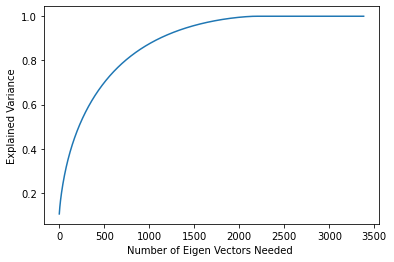

In [ ]:
# We create PCA for Review Data and reduce dimensions-Training Data
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler#Not needed as there is not much difference in TF-IDF
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
 
import matplotlib.pyplot as plt
pca = PCA(n_components=3)
p=DF_Final_TFIDF.iloc[:,9:6919]#test data 
l=pca.fit(p)
print(l.explained_variance_ratio_)
PC=pca.fit_transform(p)#Projected Data to new Space with reduced dimensions 
principalDf = pd.DataFrame(data = PC, columns = ['principal component 1', 'principal component 2','PC=3'])
principalDf
#Very low variance  and hence may not be accurate.
pca=PCA()
pca.fit(p)
cumsum=np.cumsum(pca.explained_variance_ratio_)

plt.plot(cumsum)
plt.xlabel("Number of Eigen Vectors Needed ")
plt.ylabel("Explained Variance")
pca.idea=PCA(n_components=0.95)
cumsum

PCA for Training Data  for 1000 features 

In [ ]:
#Hence we neet atleast 1000 dimenstions to represent the data
pca2=PCA(n_components=1000)
d=pca2.fit_transform(p)#New Transformed space for ADHD Training Data 
X_df=pd.DataFrame(d)
X_df
column_indices=[0,1,2,3,4,5,6]
old_names = Temp_DF.columns[column_indices]
new_names = ['Index', 'Drug','condition','reviews','rating','date','useful count']
Temp_DF.rename(columns=dict(zip(old_names, new_names)),inplace=True)
#Reformed data
Reduced_Final=pd.concat([Temp_DF.iloc[:,0:7],X_df],axis=1)#merging Transformed data space with Original Data 
n=DF_Final_TFIDF.iloc[:,[4,6,7,8,6918]]
Reduced_Final_comp_train=pd.concat([Reduced_Final,n],axis=1)
from google.colab import files
Reduced_Final_comp_train.to_csv('Final_reduced_comp_train.csv')
files.download('Final_reduced_comp_train.csv')
Reduced_Final_comp_train.head()
numeric_red_train=Reduced_Final_comp_train.iloc[:,7:]#numeric values
numeric_red_train.to_csv('numeric_red_train.csv')
files.download('numeric_red_train.csv')#download numeric values 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# ADHD and BC Specific Test Data & Train Data Model Building- Clustering on TFIDF, Doc 2 Vector and Supervised Machine Learning

# [Since it is too long to run above code- I saved the file so that i can reach this stage directly ]

In [ ]:
import pandas as pd
New_train2=pd.read_csv('/content/drive/My Drive/Project Text USML Part 2/Final_reduced.csv')
New_train=New_train2.rename(columns={"Persona Type":"Comorbidity","Persona Type2":"Medicine Trial"})
New_train
New_Test=pd.read_csv('/content/drive/My Drive/Project Text USML Part 2/Final_test_TFIDF.csv')
New_Test

,Unnamed: 0,Index,Drug,condition,reviews,rating,date,usefulcount,sentimental score,Comorbid Persona,aadd,abilify,abilities,ability,able,abnormal,aboring,abrasions,abruptly,absence,absent,absolute,absolutely,absorb,abstained,absurd,abuse,abused,abusing,abusive,academic,academically,academics,accelerated,accept,acceptable,accepted,access,accidentally,accidents,...,wrong,wrote,xanax,xl,xr,xrays,yeah,year,years,yell,yelling,yellow,yellowish,yes,yesterday,yielded,yikes,yo,yoga,yook,york,young,younger,youngest,yr,yro,yrs,zaps,zero,zeroed,zoloft,zombie,zombied,zombies,zombified,zombish,zone,zoned,zones,Second Medicine
0,0,13407,Amphetamine / dextroamphetamine,ADHD,"""Yes, this medication does work wonders, at fi...",2.0,"May 20, 2015",57,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.067395,0.064163,0.0,0.0,0.0,0.0,0.138379,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1,41991,Clonidine,ADHD,"""My 5 year old son was diagnosed with ADHD jus...",10.0,"April 30, 2011",159,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.068887,0.000000,0.0,0.0,0.0,0.0,0.000000,0.150403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2,225793,Bupropion,ADHD,"""I&#039;ve been on Wellbutrin for over a year ...",10.0,"June 15, 2011",224,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.071795,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.156751,0.131812,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,3,37351,Vyvanse,ADHD,"""56 yrs old. Tried Ritilin 15 years ago but st...",8.0,"July 6, 2015",36,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.089300,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.172211,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,4,37359,Vyvanse,ADHD,"""I had my college finals coming up and I could...",8.0,"May 1, 2015",28,0,0.0,0.0,0.0,0.0,0.0,0.125294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1121,1121,88305,Adderall,ADHD,"""I was first diagnosed with ADHD at the age of...",8.0,"June 22, 2016",65,0,NaN,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.068952,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1122,1122,37591,Vyvanse,ADHD,"""Just started taking Vyvanse. Before I was tak...",10.0,"September 12, 2010",23,0,NaN,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.103392,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0

In [ ]:
result=[]
for value in New_train['rating']:
    if value <=5:
      p=0
      result.append(p)
    elif value>5 and value<=7:
      p=1
      result.append(p)
    else:
        p=2
        result.append(p)
New_train['label_rating']=result


In [ ]:
New_train.columns

Index(['Unnamed: 0', 'Index', 'Drug', 'condition', 'reviews', 'rating', 'date',
       'useful count', '0', '1',
       ...
       '994', '995', '996', '997', '998', '999', 'sentimental score',
       'Comorbidity', 'Medicine Trial', 'label_rating'],
      dtype='object', length=1012)

In [ ]:
X_test=New_Test.iloc[:,8:1008]

In [ ]:
X_train_rev=New_train.iloc[:,8:1008]# Training data with text only after cleaning and includes rating as a label

In [ ]:
X_train_rev# X _Train TFIDF set Full of text only 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
0,-0.129890,0.134611,0.000713,-0.018611,-0.005853,-0.049717,0.068845,-0.088575,0.004930,-0.042013,-0.007852,-0.024042,-0.039940,0.008606,0.007536,-0.007400,0.079609,0.045605,-0.017790,0.036078,-0.032723,0.029837,0.000887,-0.042306,0.018831,0.035973,0.070132,0.083186,-0.007036,-0.013041,0.080037,-0.000567,-0.101779,0.017085,0.057678,0.010091,0.040774,-0.024939,0.088599,-0.009772,...,-0.007741,0.004520,0.000710,-0.021614,0.024044,0.004325,0.017015,0.010838,-0.011835,-0.015763,0.004882,-0.018765,0.003414,-0.003102,0.010391,-0.002344,0.005975,-0.007189,0.021517,-0.003329,0.003213,-0.001045,-0.000246,0.010773,-0.002416,-0.010342,-0.017428,-0.003901,0.016242,0.006209,-0.012250,-0.003808,0.023219,0.010499,-0.000700,0.020823,0.002922,-0.010618,-0.001747,-0.015664
1,0.873421,0.194949,0.068421,0.008581,0.000689,0.010013,0.016675,-0.035917,0.023311,0.019426,-0.009754,0.021595,-0.064289,-0.101088,0.017300,-0.052244,-0.129826,-0.010625,-0.029767,-0.064831,0.012441,-0.065669,-0.109354,-0.032185,0.019682,0.053995,-0.066349,-0.001851,-0.000986,0.012129,-0.004532,-0.060066,-0.095990,0.013904,-0.008118,0.160883,-0.005500,-0.081761,-0.078782,-0.007971,...,-0.007378,0.008979,0.004640,-0.027265,-0.006180,-0.008281,-0.024971,-0.019712,-0.011367,0.012069,0.003912,0.014750,0.025809,-0.025212,-0.002909,-0.018826,0.001840,-0.016590,-0.018821,0.000617,0.000446,-0.007763,-0.018211,0.006896,-0.004759,-0.010577,0.018768,-0.012166,-0.001245,-0.025476,-0.000155,0.003528,0.014063,-0.000404,-0.011835,-0.004378,-0.006403,0.009595,0.006571,0.009067
2,-0.135182,0.118867,0.064194,-0.023687,-0.002392,0.034659,-0.005954,-0.110051,-0.037889,-0.109672,-0.002484,-0.027515,-0.086241,-0.091450,-0.058867,-0.041624,0.114267,-0.133572,0.008276,0.065905,-0.192179,0.178258,0.055722,0.077545,-0.026027,-0.013032,-0.015380,0.043605,0.027553,0.143730,-0.006809,0.014653,0.017861,-0.064851,0.014710,0.023775,0.034218,-0.051931,-0.034091,-0.020581,...,0.002183,0.005558,-0.012196,0.020928,-0.007018,0.023584,0.020730,-0.011214,-0.004665,-0.009224,-0.001086,-0.013913,-0.027342,-0.000615,0.002957,0.000525,-0.001732,0.008004,0.003118,-0.005876,0.004053,0.008485,-0.000620,-0.002443,-0.007254,-0.011954,0.003772,0.013950,0.001379,0.007129,-0.002344,0.003714,0.004762,0.010827,-0.007773,-0.016260,0.002207,-0.013153,-0.002491,0.004804
3,-0.130888,0.112966,0.020324,0.020607,-0.063115,-0.095712,0.091836,-0.115061,0.002748,-0.067694,-0.002207,0.117876,-0.017524,0.101642,0.053904,0.020060,0.046419,-0.019276,-0.027095,-0.004398,-0.014460,-0.015490,0.030594,0.008603,0.074256,0.048739,-0.043002,0.027114,-0.037492,-0.018450,0.032558,0.053084,-0.034478,0.060682,-0.098256,-0.108401,0.060867,-0.017644,0.023407,0.023026,...,-0.008855,0.001038,-0.015954,-0.008774,-0.025324,-0.020248,0.029352,-0.025122,0.007029,0.006517,-0.015798,-0.003040,-0.018371,0.019332,0.010251,0.019188,-0.026709,0.001999,0.009037,0.009061,0.011265,0.004391,-0.009684,-0.016958,-0.008477,-0.011011,0.004983,0.003264,0.022079,0.007404,0.001842,0.037935,0.028759,-0.013419,-0.024109,0.025008,0.016935,-0.003298,0.009076,0.003619
4,-0.128269,0.013424,-0.122254,-0.058065,-0.006472,-0.082623,0.049634,0.097926,-0.060022,-0.115916,0.020703,0.007230,-0.031615,0.034611,0.008671,-0.066972,-0.045122,0.047852,-0.001921,-0.007443,0.006417,-0.024876,-0.036425,0.014098,-0.034956,0.040648,-0.081294,-0.032195,-0.066870,-0.008981,0.031389,-0.039480,0.056946,-0.046184,-0.002087,0.028112,-0.096875,0.108204,-0.023528,-0.060871,...,-0.013390,0.013689,-0.030973,0.028047,0.004935,-0.011912,0.015171,0.000858,-0.011305,0.018799,0.005308,-0.003379,-0.006360,0.014350,0.003484,0.015121,0.014909,0.026144,0.014906,0.002045,0.005674,-0.006944,-0.006881,0.017886,0.015025,-0.008060,-0.004770,-0.003628,0

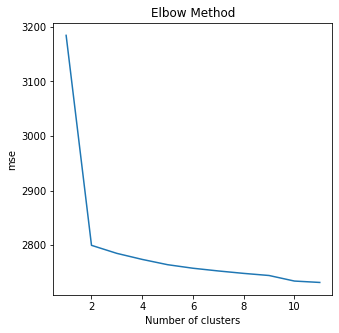

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


mse = []
#Fitting on Training data 
for i in range(1, 12):
    kmeans = KMeans(n_clusters=i,  random_state=0,init='k-means++')
    kmeans.fit(X_train_rev)
    mse.append(kmeans.inertia_)
fig = plt.figure(figsize=(5,5))
plt.plot(range(1, 12), mse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('mse')
plt.show()

Three Clusters seems a knee point -Lets use this 

In [ ]:
#Principal Component Analysis of test data
from sklearn.decomposition import PCA
def testfunctionPCA(TFIDF):
 pca=PCA()
 pca.fit(TFIDF)
 cumsum=np.cumsum(pca.explained_variance_ratio_)
 plt.plot(cumsum)
 plt.xlabel("Number of Eigen Vectors Needed for Data ")
 plt.ylabel("Explained Variance")
 return cumsum



In [ ]:
#PCA ON TFIDF_reviews

In [ ]:
pca=PCA(n_components=600)
X_train_red=pca.fit_transform(X_train_rev)
X_train_redDF=pd.DataFrame(X_train_red)# Newly transforemd training data for TFIDF Architecture 

Test Data 

array([0.12077948, 0.12812974, 0.13442634, 0.14032695, 0.14594008,
       0.15129922, 0.15656229, 0.16169226, 0.16643092, 0.17103382,
       0.17540185, 0.17962191, 0.18378353, 0.18788824, 0.19190158,
       0.1958628 , 0.19974709, 0.20351269, 0.20715168, 0.21077933,
       0.21432484, 0.21779268, 0.22119463, 0.22459179, 0.22795425,
       0.23124999, 0.23447852, 0.23767264, 0.24082329, 0.24395199,
       0.24702331, 0.25008218, 0.25307648, 0.2560588 , 0.25903229,
       0.26194862, 0.2648504 , 0.2677249 , 0.27053783, 0.27334409,
       0.27610508, 0.27883654, 0.28156022, 0.28426899, 0.2869138 ,
       0.28954934, 0.29217549, 0.29478605, 0.29738206, 0.2999559 ,
       0.30248982, 0.30500512, 0.30749172, 0.30997155, 0.31242407,
       0.31486063, 0.31727464, 0.3196734 , 0.32206487, 0.32442091,
       0.3267584 , 0.32908729, 0.33139646, 0.33368597, 0.33596975,
       0.33822576, 0.34046501, 0.34267984, 0.3448753 , 0.34705593,
       0.34923564, 0.35138708, 0.35352982, 0.35566107, 0.35777

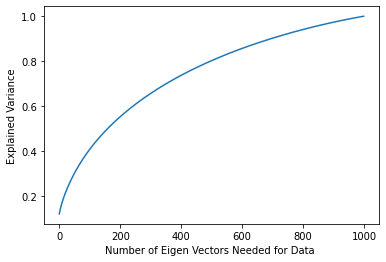

In [ ]:
testfunctionPCA(X_train_rev)

Based on the above graph we select upto 600 Singular Vectors which represents 80% variance of data 

In [ ]:
Test_Numeric_Reviews=X_test_ADHD_TFIDF.iloc[:,10:]

Number of  Reduced Dimensions needed for Test Data 

array([0.0181155 , 0.03215473, 0.04012814, ..., 1.        , 1.        ,
       1.        ])

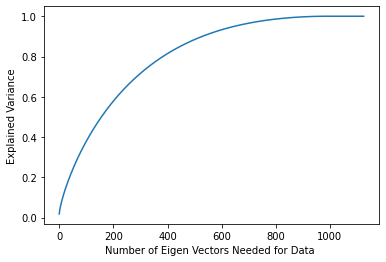

In [ ]:
testfunctionPCA(Test_Numeric_Reviews)

In [ ]:
pca=PCA(n_components=400)
X_test_red=pca.fit_transform(Test_Numeric_Reviews)
X_test_redDF=pd.DataFrame(X_test_red)
X_test_redDF=pd.concat([New_Test.iloc[:,[4,6,7,8,4704]],X_test_redDF],axis=1)
print(X_test_redDF.head())
X_test_redDF.to_csv('Finaltest_reduced_comp.csv')
files.download('Finaltest_reduced_comp.csv')


                                             reviews  ...       399
0  "Yes, this medication does work wonders, at fi...  ...  0.062861
1  "My 5 year old son was diagnosed with ADHD jus...  ... -0.523747
2  "I&#039;ve been on Wellbutrin for over a year ...  ...  0.288637
3  "56 yrs old. Tried Ritilin 15 years ago but st...  ...  0.383917
4  "I had my college finals coming up and I could...  ... -0.396248

[5 rows x 405 columns]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

TSNE

In [ ]:
New_train.columns

Index(['Unnamed: 0', 'Index', 'Drug', 'condition', 'reviews', 'rating', 'date',
       'useful count', '0', '1',
       ...
       '994', '995', '996', '997', '998', '999', 'sentimental score',
       'Comorbidity', 'Medicine Trial', 'label_rating'],
      dtype='object', length=1012)

TSNE on Training Data  for 2 dimensional based Manifold Dimension Reduction 

[Text(0.5, 1.0, 'Drug Review  T-SNE projection on Comorbidity Persona-Perplexity 20')]

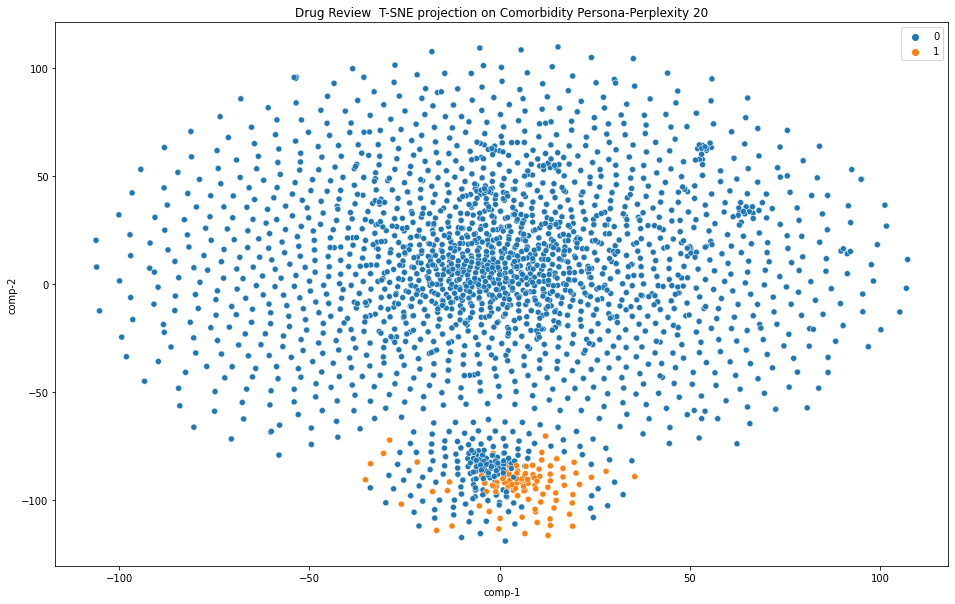

In [ ]:
import numpy as np
from sklearn.manifold import TSNE


model= TSNE(n_components=2,perplexity=20)#number of nearest neighbours 
z=model.fit_transform(X_train_rev)# Transforming into 2 dimensional Components 
model2=TSNE(n_components=2,perplexity=50)#number of nearest neighbours 
z2=model2.fit_transform(X_train_rev)
plt.figure(figsize=(16,10))
df = pd.DataFrame()
df2=pd.DataFrame()
df["y"] = New_train['Comorbidity']
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]
df2["y"] = New_train['Medicine Trial']
df2["comp-1"] = z[:,0]
df2["comp-2"] = z[:,1]


import seaborn as sns
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                data=df).set(title="Drug Review  T-SNE projection on Comorbidity Persona-Perplexity 20") 




[Text(0.5, 1.0, 'Drug Review  T-SNE projection on Medication Patterns')]

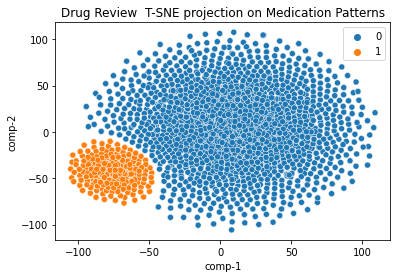

In [ ]:
sns.scatterplot(x="comp-1", y="comp-2", hue=df2.y.tolist(),
                data=df2).set(title="Drug Review  T-SNE projection on Medication Patterns") 


2
2
3
3
4
4
5
5
6
6


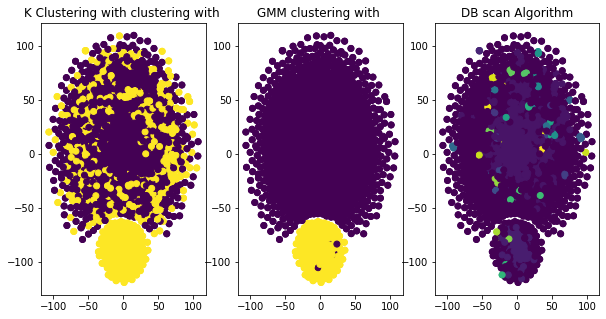

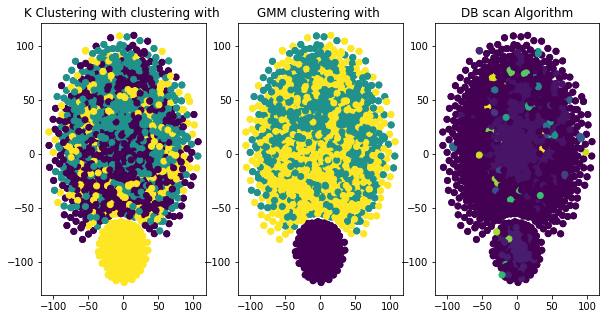

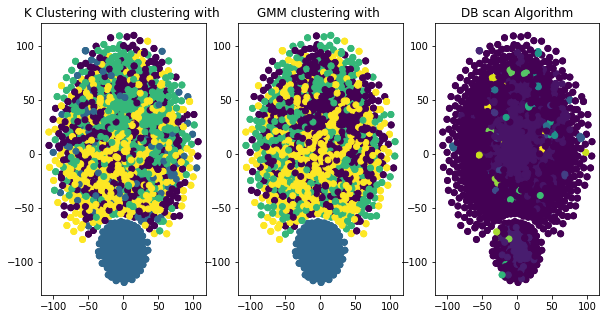

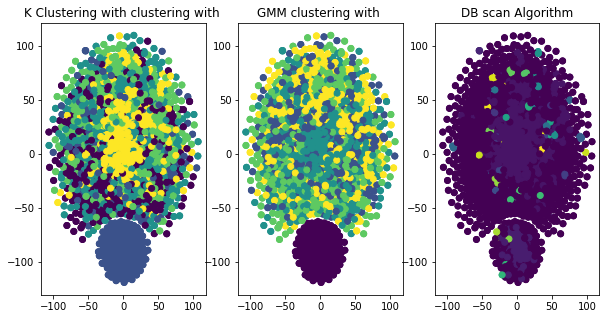

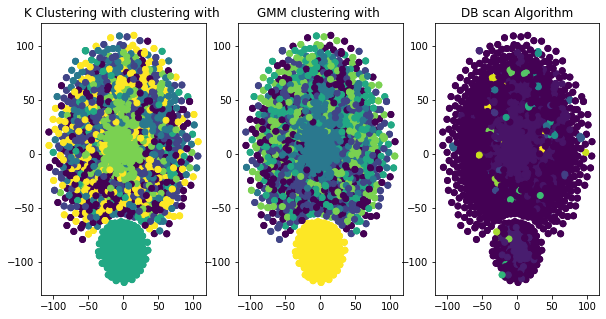

In [ ]:
#Now running Different Clustering Mechanics on TSNE model:

from sklearn.metrics import normalized_mutual_info_score, silhouette_score, calinski_harabasz_score
from sklearn.mixture import GaussianMixture as GMM
from scipy.stats import mode
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
z2#New Array 
clustersize=[2,3,4,5,6]
for i in clustersize:
  Kmeans_strat=KMeans(n_clusters=i,init='k-means++',max_iter=100,algorithm="auto")
  model1=Kmeans_strat.fit(z2)
  labels1=model1.predict(z2)
  gmm_stat=GMM(n_components=i,covariance_type='full')#each cluster has its own covariance matrix 
  model2=gmm_stat.fit(z2)
  labels2=model2.predict(z2)
  dbscan=DBSCAN(eps=3,min_samples=4)
  model3=dbscan.fit(z2)
  p=model3.labels_
  fig, axs=plt.subplots(1,3,figsize=(10,5))
  axs[0].scatter(z[:,0],z[:,1],c=labels1)
  axs[0].set_title("K Clustering with clustering with ",print(i))
  axs[1].scatter(z[:,0],z[:,1],c=labels2)
  axs[1].set_title("GMM clustering with " ,print(i))
  axs[2].scatter(z[:,0],z[:,1],c=p)
  axs[2].set_title("DB scan Algorithm")
  
   


Cluster Evaluation of Different Clusters and evaluation with respect to True Label which categorical decomposition of Useful Count. 
We want to investigate if these clusters do correspond to any relation to True Labels /True  Rating 

Text(0.5, 1.0, 'DB scan Algorithm')

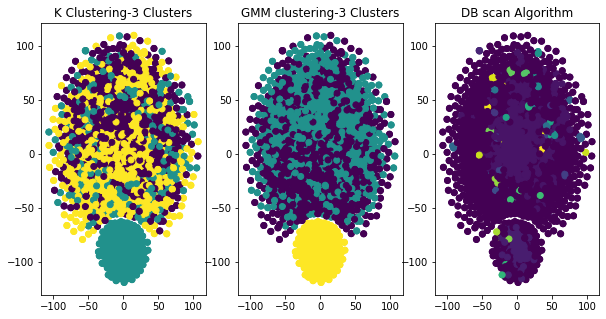

In [ ]:
#Now lets examine 3 clusters as we have 3 true lables. Also elbow suggest 2 and 3 will be good clusters,
Kmeans_strat=KMeans(n_clusters=3,init='k-means++',max_iter=100,algorithm="auto")
model1=Kmeans_strat.fit(z2)
labels1=model1.predict(z2)
gmm_stat=GMM(n_components=3,covariance_type='full')#each cluster has its own covariance matrix 
model2=gmm_stat.fit(z2)
labels2=model2.predict(z2)
dbscan=DBSCAN(eps=3,min_samples=4)
model3=dbscan.fit(z2)
p=model3.labels_
fig, axs=plt.subplots(1,3,figsize=(10,5))
axs[0].scatter(z[:,0],z[:,1],c=labels1)
axs[0].set_title("K Clustering-3 Clusters" )
axs[1].scatter(z[:,0],z[:,1],c=labels2)
axs[1].set_title("GMM clustering-3 Clusters")
axs[2].scatter(z[:,0],z[:,1],c=p)
axs[2].set_title("DB scan Algorithm")
  



In [ ]:
labels1_x=np.array(labels1)
labels2_y=np.array(labels2)
labels3_z=np.array(p)


In [ ]:
DF1=pd.DataFrame(labels1_x)#labels from Clustering k
DF2=pd.DataFrame(labels2_y)#lables from GMM
DF3=pd.DataFrame(labels3_z)#labels from DBSCAN
DFF=pd.concat([DF1,DF2,DF3],axis=1)#concat dataframe 
pred_matrix=DFF.values#Predicted Values 
true_labels=New_train['label_rating']#True Labels
def get_clustering_scores_(z2, true_labels, DFF): 
    NMI_list=[]
    SC_list=[]
    CH_list=[]
    data_matrix=z2
    for i in range(DFF.shape[1]):
       predicted_labels=DFF[:,i]
       NMI = normalized_mutual_info_score(true_labels, predicted_labels)
       NMI_list.append(NMI)
       try: 
        SC = silhouette_score(data_matrix, predicted_labels)
        CH = calinski_harabasz_score(data_matrix, predicted_labels)
        SC_list.append(SC)
        CH_list.append(CH)
       except ValueError: 
        SC = 0 
        CH = 0
        print("number of clusters = 1")
        
       print("\t NMI: ", NMI)
       print("\t SC: ", SC) 
       print("\t CH: ", CH)
       print("------------------------------------------")
        
    return (NMI_list, SC_list, CH_list)

Code Evaluation based on Mutual Information, CHI,SC

---
$$ CHI=tr(SSE)/SSW$$
$$SSE=\sum_{x in Cx }[(x-\mu)(x-\mu)^T]$$
$$SSW=1/NX*\sum_(\mu-\sigma)(\mu-\sigma)^T]$$
where$$\sigma$$ is the mean of different clusters

---



	 NMI:  0.001927991371320842
	 SC:  0.3641632
	 CH:  2651.5306848171986
------------------------------------------
	 NMI:  0.0035870612288247746
	 SC:  0.3349561
	 CH:  2110.7145559725573
------------------------------------------
	 NMI:  0.02728664377385332
	 SC:  -0.5333137
	 CH:  22.620042325993513
------------------------------------------


Text(0.5, 1.0, 'CH Index-Training')

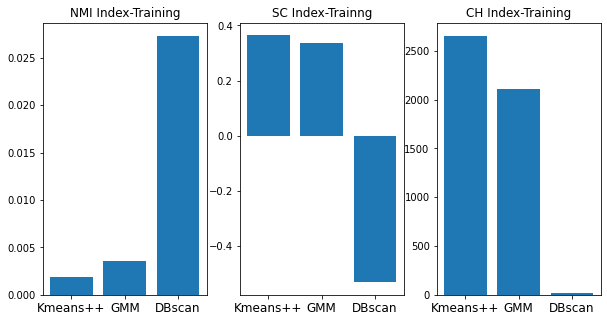

In [ ]:
a,b,c=get_clustering_scores_(z2,true_labels,pred_matrix)

#Replace the tick numbers with strings:

cluster=["Kmeans++","GMM","DBscan"]
ypos=np.arange(len(cluster))

fig,axs=plt.subplots(1,3,figsize=(10,5))
axs[0].set_xticks(ypos)
axs[0].set_xticklabels(cluster,fontsize=12)

axs[0].bar(ypos,a)
axs[0].set_title("NMI Index-Training")
axs[1].set_xticks(ypos)
axs[1].set_xticklabels(cluster,fontsize=12)
axs[1].bar(ypos,b)
axs[1].set_title("SC Index-Trainng")

axs[2].set_xticks(ypos)
axs[2].set_xticklabels(cluster,fontsize=12)
axs[2].bar(ypos,c)
axs[2].set_title("CH Index-Training")


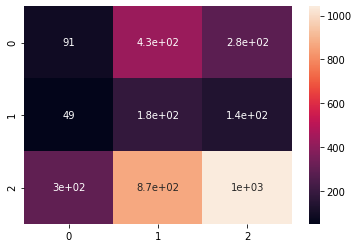

GMM Clustering Confusion Matrix
0.38870824711794266 GMM accuracy


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
matrix2=confusion_matrix(y_true=New_train['label_rating'],y_pred=labels2)#
sns.heatmap(matrix2, annot=True)
plt.show()
print("GMM Clustering Confusion Matrix")
accuracy=np.trace(matrix2)/np.sum(matrix2)
print(accuracy,"GMM accuracy")


In [ ]:
def plot_Conf_Matrix(y_t,y_pre):
   matrix2=confusion_matrix(y_t,y_pre)
   sns.heatmap(matrix2, annot=True)
   plt.show()
   accuracy=np.trace(matrix2)/np.sum(matrix2)
   return accuracy


In [ ]:
a1=plot_Conf_Matrix(New_train['label_rating'],labels1)
a2=plot_Conf_Matrix(New_train['label_rating'],labels2)
#Top plot represents KNN and bottom plot GMM
print(a1,"Accuracy of K++ Clustering on TSNE matrix based on TF IDF")
print(a2,"Accuracy of GMM Clustering on TSNE Dimensions on TFIDF ")

Text(0.5, 1.0, 'Accuracy on Training data based on TSNE reduction')

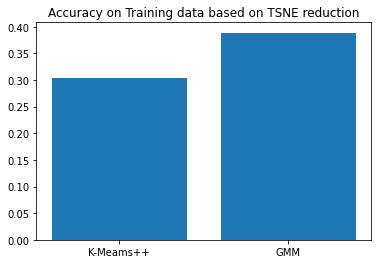

In [ ]:
List1=[a1,a2]
x_names=["K-Meams++","GMM"]
x_pos=np.arange(len(x_names))
plt.xticks(x_pos)
plt.xticks(x_pos, x_names) #Replace default x-ticks with xs, then replace xs with labels

plt.bar(x_pos,List1)
plt.title("Accuracy on Training data based on TSNE reduction")

In [ ]:
!pip install gensim

Now since we are done with TFIDF Architecture- I would now move on to Doc 2 Vector Architecture and Word 2 Vec. We are primarily using Doc 2 Vec for Supervised Machine Learning 

In [ ]:
#cleaned corpus for adhd 
cleanedcorpus_train_ADHD
cleanedcorpus_train2# Cleaned Corpus for BC


['used  take another oral contraceptive      pill cycle     happy   light periods  max   days    side effects    contained hormone gestodene     available  us    switched  lybrel    ingredients  similar     pills ended   started lybrel immediately    first day  period    instructions said    period lasted  two weeks   taking  second pack   two weeks      third pack things got even worse   third period lasted  two weeks        end   third week   still  daily brown discharge   positive side           side effects   idea   period free   tempting  alas',
 'first time using  form  birth control      glad  went   patch          months   first  decreased  libido   subsided    downside    made  periods longer      days   exact   used    periods      days max also made  cramps intense   first two days   period   never  cramps  using birth control      happy   patch',
 'pill  many years    doctor changed  rx  chateal     effective   really  help   completely clearing  acne   takes    months thou

In [ ]:
from gensim.models import  Word2Vec
model1=Word2Vec(cleanedcorpus_train_ADHD,min_count=20)# word 2 vector contains list of sentences where each list is a sentence  or post.

In [ ]:
cleanedcorpus_train_ADHD[0]# Example of a post . Each post is a list 

'son  halfway   fourth week  intuniv   became concerned   began  last week    started taking  highest dose       two days   could hardly get   bed    cranky   slept  nearly   hours   drive home  school vacation   unusual     called  doctor  monday morning   said  stick     days  see     school    getting    morning   last two days   problem free    much  agreeable  ever    less emotional   good thing  less cranky    remembering   things    overall  behavior  better    tried many different medications   far     effective'

In [ ]:
def Hyperparameters_tuning(k,count,X):
  k=k# Number of Nearest contextual words considered in prediciton 
  count=count# WOrd count whose frequency is less than this number. This is to ensure that our model is only senstive to key words 
  param=[]
  for i in k:
    for j in count:
         model=Word2Vec(X,size=5300,window=i,min_count=j,min_alpha=0.8)#
         param.append(model)
  return param

In [ ]:
k1=[4,5,6]# Number of Nearest contextual words considered in prediciton 
count1=[5,15,20]# WOrd count whose frequency is less than this number. This is to ensure that our model is only senstive to key words
output=Hyperparameters_tuning(k1,count1,cleanedcorpus_train_ADHD)
#

In [ ]:
output[0]#list of models with differnet hyper parameters 
#This model will train vector of words. 

In [ ]:
from gensim.models.doc2vec import Doc2Vec,TaggedDocument

We will now covert tokenized document into Tagged document formatFOR 

*  ADHD
*  BIRTH CONTROL



In [ ]:
documents=[TaggedDocument(p,[i]) for i ,p in enumerate(cleanedcorpus_train_ADHD)]
documents_bc=[TaggedDocument(p,[i]) for i ,p in enumerate(cleanedcorpus_train2)]

In [ ]:
documents[1:10]# each document  is like a post
documents_bc[:10]

[TaggedDocument(words='used  take another oral contraceptive      pill cycle     happy   light periods  max   days    side effects    contained hormone gestodene     available  us    switched  lybrel    ingredients  similar     pills ended   started lybrel immediately    first day  period    instructions said    period lasted  two weeks   taking  second pack   two weeks      third pack things got even worse   third period lasted  two weeks        end   third week   still  daily brown discharge   positive side           side effects   idea   period free   tempting  alas', tags=[0]),
 TaggedDocument(words='first time using  form  birth control      glad  went   patch          months   first  decreased  libido   subsided    downside    made  periods longer      days   exact   used    periods      days max also made  cramps intense   first two days   period   never  cramps  using birth control      happy   patch', tags=[1]),
 TaggedDocument(words='pill  many years    doctor changed  rx  ch

Vector size of 64 represents that each feedback post on drugs will be represented by a vector of 64 floating values. The min_count sets a threshold so that terms that only occursat least that times will be considered in the vocabulary. The workers represents number of threads while training the process and and epochs mean number of iterations that will be made over the word coprus

In [ ]:
def parameter_tuning(v,count):
    #instantiate model
    model = Doc2Vec(vector_size=v, window=3, min_count=count , workers=4, epochs = 3)#build vocab
    model.build_vocab(documents)#train model
    model.train(documents, epochs=model.epochs,total_examples=model.corpus_count)
    return model

In [ ]:

x=parameter_tuning(v=16,count=40)# Parametric tuning of model with vector of 32, count 40
x2=parameter_tuning(v=8,count=30)
x3=parameter_tuning(v=32,count=20)

ADHD DOC2  VEC Models

In [ ]:
doc2vecnew = [x.infer_vector((cleanedcorpus_train_ADHD[i].split(' '))) 
            for i in range(0,len(cleanedcorpus_train_ADHD))]
doc2vecnew2=[x2.infer_vector((cleanedcorpus_train_ADHD[i].split(' '))) 
            for i in range(0,len(cleanedcorpus_train_ADHD))]
doc2vecnew3=[x3.infer_vector((cleanedcorpus_train_ADHD[i].split(' '))) 
            for i in range(0,len(cleanedcorpus_train_ADHD))]
# Each document is vector in R 64 space

In [ ]:
doc2vecnew_bc = [x.infer_vector((cleanedcorpus_train2[i].split(' '))) 
            for i in range(0,len(cleanedcorpus_train2))]
doc2vecnew2_bc=[x2.infer_vector((cleanedcorpus_train2[i].split(' '))) 
            for i in range(0,len(cleanedcorpus_train2))]
doc2vecnew3_bc=[x3.infer_vector((cleanedcorpus_train2[i].split(' '))) 
            for i in range(0,len(cleanedcorpus_train2))]

TRAINING THE ADHD 

In [ ]:
doc2vecnew[1:5]# 
X_train_nn=pd.DataFrame(doc2vecnew)
X_train_arr=X_train_nn.values
Y_train=New_train['rating']
X_train_arr.shape

(3383, 16)

Supervised Machine Learning to Predict the Score

Test Data 

In [ ]:
doc2vecnew_test= [x.infer_vector((cleanedcorpus_test[i].split(' '))) 
            for i in range(0,len(cleanedcorpus_test))]
X_test_nn=pd.DataFrame(doc2vecnew_test)#test 
X_test_arr=X_test_nn.values#test data  array 
Y_test_nn=test['rating']


Splitting of Training Data into Sub Training and Validation Test for ADHD  . Training would be done in sub -training set and validation set will be used to validate the best model.
Now we need to break the training data for TFIDF Pre-processing and Doc 2 Vector Model

In [ ]:
import tensorflow as tf
import tensorflow 

from tensorflow import keras
from keras.layers import Dense
from sklearn.model_selection import train_test_split
X_trainnew, X_valid, y_trainnew, y_valid = train_test_split( X_train_nn, Y_train, test_size=0.33, random_state=42)
X_trainnew2, X_valid2, y_trainnew2, y_valid2 = train_test_split( X_train_red, Y_train, test_size=0.33, random_state=42)

Neural Network based model with ReLu Activation Function($\phi(x)$) on Doc 2 Vector Model

We are creating two modeks
First we will create model 1 on DOC 2 VEC MODEL

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10, input_shape=[16]))#Input data 
model.add(Dense(8, activation='relu'))# Layer 1  stacked with 8 Neurons
model.add(Dense(4,activation='relu'))#Layer2 Stacked with 4 Neurons 
model.add(Dense(1,activation='relu'))# Final Outputl Layer 
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 10)                170       
_________________________________________________________________
dense_17 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_18 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 5         
Total params: 299
Trainable params: 299
Non-trainable params: 0
_________________________________________________________________


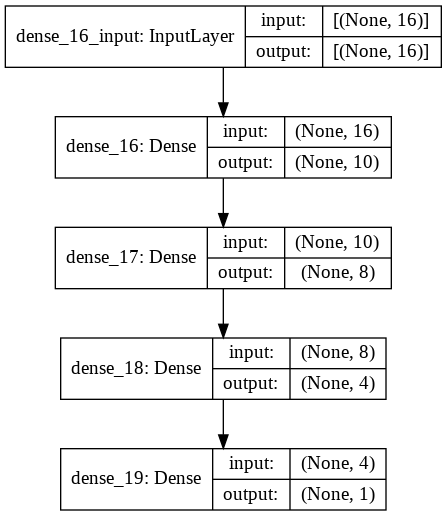

In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

In [ ]:
num_epochs=10
model.compile(loss='mean_squared_error', 
             optimizer='sgd', 
             metrics='mse')#stochiastic gradient tool is used to optimize the weights
model.fit(X_trainnew,y_trainnew,epochs=num_epochs)

Epoch 1/10
71/71 [==============================] - 0s 2ms/step - loss: 8.6196 - mse: 8.6196
Epoch 2/10
71/71 [==============================] - 0s 2ms/step - loss: 8.5516 - mse: 8.5516
Epoch 3/10
71/71 [==============================] - 0s 2ms/step - loss: 8.6161 - mse: 8.6161
Epoch 4/10
71/71 [==============================] - 0s 2ms/step - loss: 8.5770 - mse: 8.5770
Epoch 5/10
71/71 [==============================] - 0s 2ms/step - loss: 8.6286 - mse: 8.6286
Epoch 6/10
71/71 [==============================] - 0s 2ms/step - loss: 8.5647 - mse: 8.5647
Epoch 7/10
71/71 [==============================] - 0s 2ms/step - loss: 8.5367 - mse: 8.5367
Epoch 8/10
71/71 [==============================] - 0s 2ms/step - loss: 8.6161 - mse: 8.6161
Epoch 9/10
71/71 [==============================] - 0s 2ms/step - loss: 8.5953 - mse: 8.5953
Epoch 10/10
71/71 [==============================] - 0s 2ms/step - loss: 8.5570 - mse: 8.5570


In [ ]:
import matplotlib.pyplot as plt
history = model.fit(X_trainnew, y_trainnew, epochs=30,
                    validation_data=(X_valid, y_valid))



history



Epoch 1/30
71/71 [==============================] - 0s 4ms/step - loss: 8.6055 - mse: 8.6055 - val_loss: 8.8007 - val_mse: 8.8007
Epoch 2/30
71/71 [==============================] - 0s 3ms/step - loss: 8.5504 - mse: 8.5504 - val_loss: 8.8289 - val_mse: 8.8289
Epoch 3/30
71/71 [==============================] - 0s 2ms/step - loss: 8.5492 - mse: 8.5492 - val_loss: 8.8125 - val_mse: 8.8125
Epoch 4/30
71/71 [==============================] - 0s 2ms/step - loss: 8.5591 - mse: 8.5591 - val_loss: 8.8208 - val_mse: 8.8208
Epoch 5/30
71/71 [==============================] - 0s 2ms/step - loss: 8.6054 - mse: 8.6054 - val_loss: 8.8891 - val_mse: 8.8891
Epoch 6/30
71/71 [==============================] - 0s 2ms/step - loss: 8.5721 - mse: 8.5721 - val_loss: 8.8177 - val_mse: 8.8177
Epoch 7/30
71/71 [==============================] - 0s 2ms/step - loss: 8.5601 - mse: 8.5601 - val_loss: 8.9254 - val_mse: 8.9254
Epoch 8/30
71/71 [==============================] - 0s 2ms/step - loss: 8.5501 - mse: 8.55

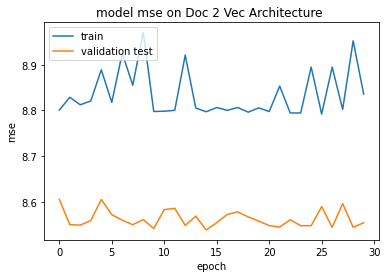

In [ ]:
history.history.keys()
plt.plot(history.history['val_mse'])
plt.plot(history.history['mse'])
plt.title('model mse on Doc 2 Vec Architecture ')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'validation test'], loc='upper left')
plt.show()


In [ ]:
y_test=model.predict(X_test_nn)#Predicts the score  for test data
y_test 

array([[7.3544507],
       [7.3960314],
       [7.2834096],
       ...,
       [7.3348722],
       [7.357718 ],
       [7.360778 ]], dtype=float32)

In [ ]:
model.evaluate(X_train_arr,Y_train)
New_train.columns

106/106 [==============================] - 0s 2ms/step - loss: 8.5713 - mse: 8.5713


Index(['Unnamed: 0', 'Index', 'Drug', 'condition', 'reviews', 'rating', 'date',
       'useful count', '0', '1',
       ...
       '994', '995', '996', '997', '998', '999', 'sentimental score',
       'Comorbidity', 'Medicine Trial', 'label_rating'],
      dtype='object', length=1012)

In [ ]:
Y_pred_train=model.predict(X_train_arr)
Y_pred_train

array([[7.362236 ],
       [7.291833 ],
       [7.354122 ],
       ...,
       [7.303149 ],
       [7.47929  ],
       [7.4411993]], dtype=float32)

In [ ]:
DF_pred=pd.DataFrame(Y_pred_train)
y_pr=DF_pred.values# matrix 
q=y_pr.reshape(-1,)# converting into single array 

** Model 2 -Running Neural Network based on Model onTFIDF Architecture **

In [ ]:
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Dense(10, input_shape=[600]))#Input data 
model2.add(Dense(8, activation='relu'))# Layer 1  stacked with 8 Neurons
model2.add(Dense(4,activation='relu'))#Layer2 Stacked with 4 Neurons 
model2.add(Dense(1,activation='relu'))# Final Outputl Layer 
model2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 10)                6010      
_________________________________________________________________
dense_21 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_22 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 5         
Total params: 6,139
Trainable params: 6,139
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs=30
model2.compile(loss='mean_squared_error', 
             optimizer='sgd', 
             metrics='mse')#stochiastic gradient tool is used to optimize the weights
history2=model2.fit(X_trainnew2,y_trainnew2,epochs=num_epochs,validation_data=(X_valid2, y_valid2))

Epoch 1/30
71/71 [==============================] - 1s 4ms/step - loss: 4.8170 - mse: 4.8170 - val_loss: 5.7481 - val_mse: 5.7481
Epoch 2/30
71/71 [==============================] - 0s 3ms/step - loss: 4.6582 - mse: 4.6582 - val_loss: 5.3222 - val_mse: 5.3222
Epoch 3/30
71/71 [==============================] - 0s 3ms/step - loss: 4.7064 - mse: 4.7064 - val_loss: 5.4873 - val_mse: 5.4873
Epoch 4/30
71/71 [==============================] - 0s 3ms/step - loss: 4.1510 - mse: 4.1510 - val_loss: 5.4314 - val_mse: 5.4314
Epoch 5/30
71/71 [==============================] - 0s 3ms/step - loss: 4.4108 - mse: 4.4108 - val_loss: 5.1936 - val_mse: 5.1936
Epoch 6/30
71/71 [==============================] - 0s 3ms/step - loss: 4.2875 - mse: 4.2875 - val_loss: 5.2579 - val_mse: 5.2579
Epoch 7/30
71/71 [==============================] - 0s 3ms/step - loss: 3.7700 - mse: 3.7700 - val_loss: 5.6894 - val_mse: 5.6894
Epoch 8/30
71/71 [==============================] - 0s 3ms/step - loss: 4.0041 - mse: 4.00

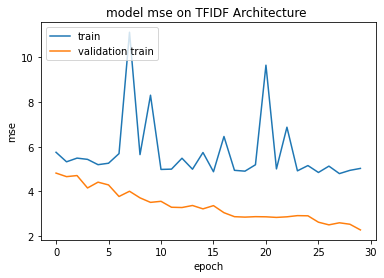

In [ ]:
history2.history.keys()
plt.plot(history2.history['val_mse'])
plt.plot(history2.history['mse'])
plt.title('model mse on TFIDF Architecture ')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'validation train'], loc='upper left')
plt.show()


# Combining data with original Data training

In [ ]:
New_train['Ypred']=Y_pred_train#Adding Prediction value to Training Data 


In [ ]:
New_train.groupby(["Drug","Medicine Trial","Comorbidity"])['Ypred'].mean()

Drug           Medicine Trial  Comorbidity
Adderall       0               0              7.410703
               1               0              7.355842
                               1              7.354311
Adderall XR    0               0              7.387294
               1               0              7.401944
                                                ...   
Wellbutrin     1               1              7.456095
Wellbutrin SR  0               0              7.299908
Wellbutrin XL  0               0              7.342227
Zenzedi        0               0              7.493502
               1               1              7.341692
Name: Ypred, Length: 106, dtype: float32

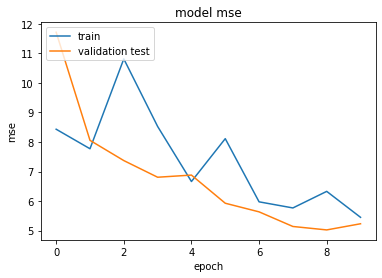

In [ ]:
history2.history.keys()
plt.plot(history2.history['val_mse'])
plt.plot(history2.history['mse'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'validation test'], loc='upper left')
plt.show()



Validation Error

Text(0.5, 0.98, 'Validation Error')

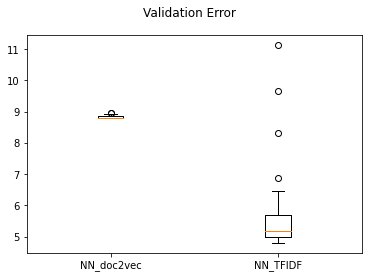

In [ ]:
Model_list_Validation=["NN_Doc2 Vec","NN_TFIDF"]
Box_values=[history.history['val_mse'],history2.history['val_mse']]

fig,ax=plt.subplots()
ax.boxplot(Box_values)
data=['NN_doc2vec','NN_TFIDF']
ax.set_xticklabels(data)
fig.suptitle('Validation Error', fontsize=12)


Text(0.5, 0.98, 'Training Error')

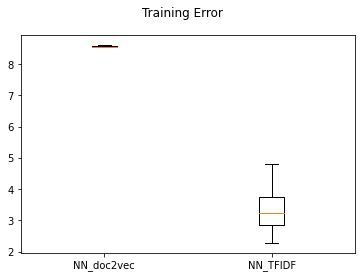

In [ ]:
Model_list_Train=["NN_Doc2 Vec","NN_TFIDF"]
Box_values=[history.history['mse'],history2.history['mse']]

fig,ax=plt.subplots()
ax.boxplot(Box_values)
data=['NN_doc2vec','NN_TFIDF']
ax.set_xticklabels(data)
fig.suptitle('Training Error', fontsize=12)


In [ ]:
from sklearn.linear_model import ridge_regression as rr
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
model=LinearRegression()
model.fit(X_trainnew,y_trainnew)
#linear Function on Sub Training Data 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred=model.predict(X_trainnew)
y_pred_lin_valid=model.predict(X_train)

In [ ]:
print(mean_squared_error(y_trainnew,y_pred))

y_pred_total=model.predict(X_train_arr)

8.416052051362426


In [ ]:
maxima_rating_predicted=np.max(y_pred)
minima_rating_predicted=np.min(y_pred)
print(maxima_rating_predicted,minima_rating_predicted)
New_train['Y_pred_linreg']=y_pred_total

8.59246864163684 6.3654979304530395


In [ ]:
#Persona Creating from Key Features from words

def Persona_User(row):
   if (row['Medicine Trial']==0 and row['Comorbidity']==0):
       val=1
   elif (row['Medicine Trial']==1 and row['Comorbidity']==0):
       val=2
   elif (row['Medicine Trial']==0 and row['Comorbidity']==1):
       val=3
   else:
       val=4
   return val

In [ ]:
New_train['Persona_User_t']=New_train.apply(Persona_User,axis=1)
Recomm_data=New_train.iloc[:300,:]
Recomm_data.groupby(["Drug","Persona_User_t"])['Y_pred_linreg'].mean()
Recomm_data.columns

Index(['Unnamed: 0', 'Index', 'Drug', 'condition', 'reviews', 'rating', 'date',
       'useful count', '0', '1',
       ...
       '997', '998', '999', 'sentimental score', 'Comorbidity',
       'Medicine Trial', 'label_rating', 'Ypred', 'Persona_User_t',
       'Y_pred_linreg'],
      dtype='object', length=1015)

We now have two options-Either to use the best model on test data directly or use again on training data for recommendation engine. Given the fact that we also have to train the recommendation engine- it is best to use training data for evaluation on recommendation systems 

In [ ]:
from google.colab import files
RecoEngine=Recomm_data.iloc[:,[1014,1013,2]]
RecoEngine.to_csv("Recommendation_ADHD.csv")
files.download("Recommendation_ADHD.csv")


THE BELOW CODE HAS THEN BEEN MOVED TO NEXT FILE SO AS TO REMOVE DEPENDENCY ON THIS NOTE BOOK AS IT IS GETTING TOO LONG



PLEASE USE 2ND NOTE BOOK APPENDED 


******************************************************************************************************** END OF PART 1*********************************************

In [ ]:

DF_Rec=pd.read_csv('/content/drive/My Drive/Project Text USML Part 2/Recommendation_ADHD.csv')
DF_Rec2=DF_Rec.iloc[:,:]
DF_Rec2
Y=pd.factorize(DF_Rec2.Drug)
Y[0]
DF_Rec2['DrugIndex']=Y[0]
DF_Rec2.rename(columns={'Unnamed: 0':'User_Index'})
DF_Rec2


In [ ]:
!pip install surprise
from surprise import Reader, Dataset
from surprise.model_selection import train_test_split
from surprise.prediction_algorithms import KNNBasic,KNNWithMeans,KNNBaseline
from surprise import accuracy
reader = Reader()
data = Dataset.load_from_df(DF_Rec2.iloc[:,[0,1,3]], reader)

In [ ]:
data_table = pd.pivot_table(DF_Rec2,values='Y_pred_linreg',columns='Drug',index='Persona_User_t')
data_table.head()


In [ ]:
#Import the train_test_split function
from sklearn.model_selection import train_test_split

#Assign X as the original ratings dataframe and y as the user_id column of ratings.
X = DF_Rec2.copy()
y = DF_Rec2['DrugIndex']

#Split into training and test datasets, stratified drugs
y

In [ ]:
#Import the mean_squared_error function
from sklearn.metrics import mean_squared_error

#Function that computes the root mean squared error (or RMSE)
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

#Split into training and test datasets, stratified along user_id
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [ ]:
def score(cf_model):
    
    #Construct a list of user-drug tuples from the testing dataset
    id_pairs = zip(X_test['Unnamed: 0'], X_test['drug_id'])
    
    #Predict the rating for every user-movie tuple
    y_pred = np.array([cf_model(user, medicine) for (user, medicine) in id_pairs])
    
    #Extract the actual ratings given by the users in the test data
    y_true = np.array(X_test['rating'])
    
    #Return the final RMSE score
    return rmse(y_true, y_pred)


In [ ]:
r_matrix = DF_Rec2.pivot_table(values='Y_pred_linreg', index='Unnamed: 0', columns='DrugIndex')
r_matrix


In [ ]:
def cf_user_mean(DrugIndex):
    
    #Check if DrugIndex  exists in r_matrix
    if DrugIndex in r_matrix:
        #Compute the mean of all the ratings given to the drug
        mean_rating = r_matrix[DrugIndex].mean()
    else:
        #Default to a rating of 3.0 in the absence of any information
        mean_rating = 5.0
    
    return mean_rating


In [ ]:
list2=[]
for index,rows in DF_Rec2.iterrows():
        q=cf_user_mean(rows['DrugIndex'])
        list2.append(q)

array1=np.array(list2)
array1.shape

In [ ]:
r_matrix_dummy = r_matrix.copy().fillna(0)
r_matrix_dummy

In [ ]:
r_matrix_dummy

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

#Compute the cosine similarity matrix using the dummy ratings for different drugs by different users 
cosine_sim = cosine_similarity(r_matrix_dummy, r_matrix_dummy)


In [ ]:
cosine_sim

In [ ]:
cosine_sim = pd.DataFrame(cosine_sim, index=r_matrix.index, columns=r_matrix.index)

cosine_sim

In [ ]:
def cf_user_wmean(user_id,drug_id):
    
    #Check if drug_id exists in r_matrix
    if DrugIndex in r_matrix:
        #Get the similarity scores for the user in question with every other user
        sim_scores = cosine_sim[user_id] 
        #Get the user rating for drug
        m_ratings = r_matrix[DrugIndex]# Rating Vector for Given Drug 
        #Extract the indices containing NaN in the Rating 
        idx = m_ratings[m_ratings.isnull()].index
        #Drop the NaN values from the m_ratings Series
        m_ratings = m_ratings.dropna()
        #Drop the corresponding cosine scores from the sim_scores series
        sim_scores = sim_scores.drop(idx)
        #Compute the final weighted mean
        wmean_rating = np.dot(sim_scores, m_ratings)/ sim_scores.sum()
    
    else:
        #Default to a rating of 3.0 in the absence of any information
        wmean_rating = 3.0
    
    return wmean_rating


Now lets find individuals with Persona_t=4 such that  individuals with both comorbidity and have taken second medicines - what medicine is likely to help them more?


In [ ]:
X=DF_Rec2[DF_Rec2.Persona_User_t==4]
min(X.Y_pred_linreg)